# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
# импортирую библиотеки
import pandas as pd
import numpy as np
# убираю ограничение на количество отоброжаемых столбцов
pd.set_option('display.max_columns', None)
# сохраняю csv файл в переменной
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# изучаю общий вид таблицы данных
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отлично, что ты увеличиваешь лимит для отображаемых столбцов, чтобы было видно всю таблицу
</div>

In [ ]:
# Изучаю общую информацию об имеющихся данных
data.info()
# Сохраню старую базу данных, для сравнния в конце
data_old = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сохранил изначальную базу данных, что бы в конце сравнить количество отброшенных значений
</div>

#### Описание информации о базе данных

При обработке данных потребуется изменить следующие форматы в базе данных:

В формат int из формата float:
- last_price
- floors_total
- balcony
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- airports_nearest
- city_centers_nearest
- days_exposition

В формат bool из формата object:
- is_apartment

В формат даты:
- first_day_exposition object

Присутствует нарешуние стиля (не соблюден snake case) в следующих колонках:
- 'parks_around3000'
- 'ponds_around3000'
- 'cityCenters_nearest'


In [ ]:
# изучаем количество абсолютных и относительных пропусков в таблице
def missing(data):
    count_missing = data.isna().sum()
    percent_missing = round(data.isna().sum() * 100 / len(data), 2)

    missing_value_data = pd.DataFrame({'Количество пропусков': count_missing,
                                       'Процент пропусков': percent_missing})

    return missing_value_data
missing(data)

,Количество пропусков,Процент пропусков
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


#### Описание пропущенных значений

Предварительная оценка качества данных:

Большинство пропуском, характерны, для человеческого фактора. Если нет возможности легко получить информацию (высота потолков, площадь кухни и т.п.), то автор объявления, вероятно, просто пропускает эти пункты при заполнении. Аналогично происходит с данными, которые известны, но отсутствуют: к примеру, нет балкона, вместо указания "0" - просто пропускается пункт.
Пропуске в столбце "is_apartment" вероятнее всего образованы по тому же принципу: раз объект в объявлении не является апартаментами, то пользователь просто пропускал ввод данных при заполнении
Некоторые пропуски являются следствием отсутствия других данных, такие как "parks_nearest" и "ponds_nearest".
Так же возможны пропуски связанные с особенностью выгрузки баззы данных, например "days_exposition" считается от даты открытия объявления до закрытия, если на момент выгрузки базы данных объявление были актуально (соответсвенно не имело даты закрытия) - формировался пропуск.

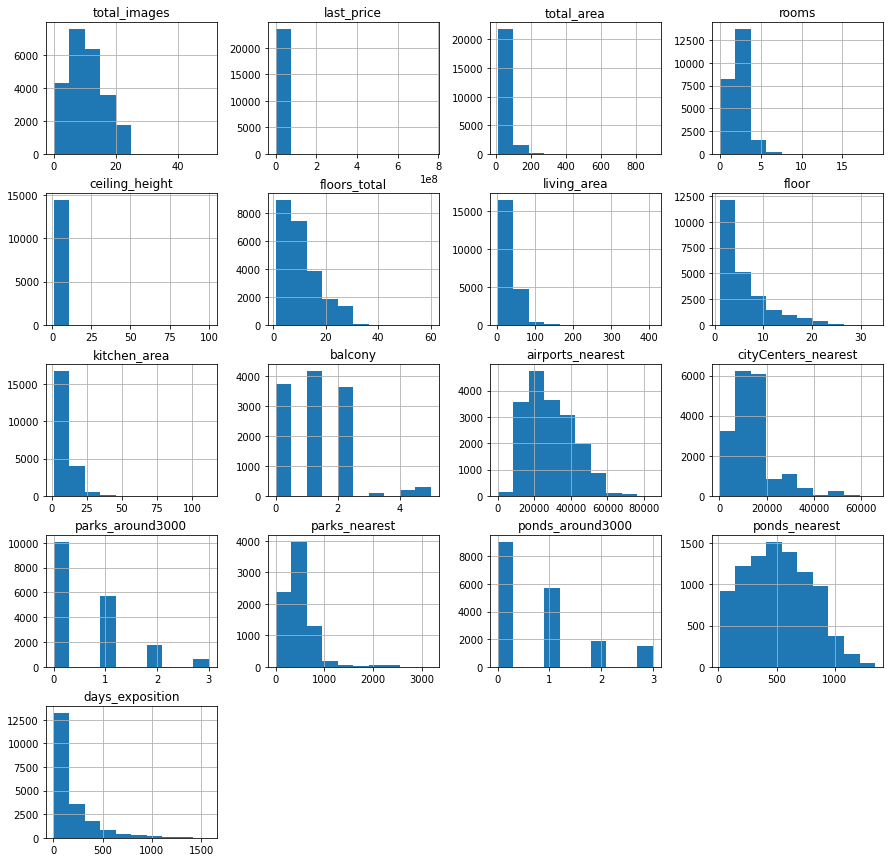

In [ ]:
# строю гистрограммы
data.hist(figsize=(15, 15));

### Предобработка данных

In [ ]:
# Переименовываю колонки в соответствии с "правильным регистром"

data = data.rename(
    columns={'parks_around3000':'parks_around_3000',
             'ponds_around3000':'ponds_around_3000',
             'cityCenters_nearest':'city_centers_nearest'}
)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
# Меняем формат из object в bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [ ]:
# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# функция для быстрого просмотра данных столбца
def analysis(column):
    print('Тип данных', data[column].dtypes)
    print('Количество пропусков',data[column].isna().sum())
    if data[column].dtypes != 'object':
        print('минимальное значение:',data[column].min(), 'максимальное значение:', data[column].max() )
    print('уникальные значения:', '\n', data[column].value_counts())


#### Столбец "last_price"

In [ ]:
analysis('last_price')
data['last_price'].describe()

Тип данных float64
Количество пропусков 0
минимальное значение: 12190.0 максимальное значение: 763000000.0
уникальные значения: 
 4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Наблюдаем минимальное значение 12190, что не может быть реальной ценой, вероятней всего цена была указана в тыс. руб.
Просмотрим все случаи ниже минимального возможного порога

In [ ]:
display(data.loc[(data['last_price']<500000)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,True,False,False,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,NaN,5.0,NaN,3,True,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,True,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,True,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.50,5.0,17.0,5,True,False,False,5.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,True,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,NaN,2.0,16.0,1,True,False,False,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,True,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,True,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,True,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Изучаем объявления в пределах предполагаемой новой цены
display(
    data.loc[(data['last_price']>12500000)&
    (data['last_price']<13000000)&
    (data['locality_name']=='Санкт-Петербург' )]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
320,2,12734000.0,97.0,2016-01-30T00:00:00,3,NaN,10.0,51.2,7,True,False,False,18.4,0.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,195.0
398,7,12789000.0,79.3,2014-12-09T00:00:00,2,3.0,8.0,43.1,5,False,False,False,17.6,NaN,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1345.0
721,20,12750000.0,61.0,2017-11-11T00:00:00,2,2.7,16.0,33.0,4,True,False,False,12.0,2.0,Санкт-Петербург,9908.0,11132.0,0.0,NaN,0.0,NaN,150.0
1022,14,12585022.0,90.3,2016-08-05T00:00:00,3,2.7,9.0,53.4,7,False,False,False,11.6,NaN,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,740.0
1067,14,12900000.0,158.6,2017-11-24T00:00:00,5,3.0,5.0,125.0,5,True,False,False,25.0,NaN,Санкт-Петербург,22452.0,4172.0,1.0,626.0,0.0,NaN,499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22701,20,12800000.0,103.3,2016-05-24T00:00:00,4,2.8,10.0,51.0,9,True,False,False,22.1,4.0,Санкт-Петербург,50760.0,13235.0,2.0,412.0,0.0,NaN,679.0
22729,20,12959000.0,73.1,2019-02-19T00:00:00,3,2.8,25.0,38.1,20,True,False,False,14.8,2.0,Санкт-Петербург,38850.0,12548.0,1.0,724.0,0.0,NaN,NaN
23134,4,12900000.0,118.0,2016-01-20T00:00:00,3,3.0,6.0,53.0,6,False,False,False,36.0,0.0,Санкт-Петербург,23476.0,4258.0,0.0,NaN,0.0,NaN,332.0
23166,15,12900000.0,97.0,2018-03-24T00:00:00,3,NaN,16.0,63.0,9,True,False,False,14.0,NaN,Санкт-Петербург,30905.0,7044.0,1.0,59.0,2.0,58.0,207.0


In [ ]:
# Выставляем корректную цену объявления
data.loc[8793, 'last_price'] = 12190000
# Проверяем
display(data.loc[(data['last_price']<500000)& (data['locality_name']=='Санкт-Петербург' )])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


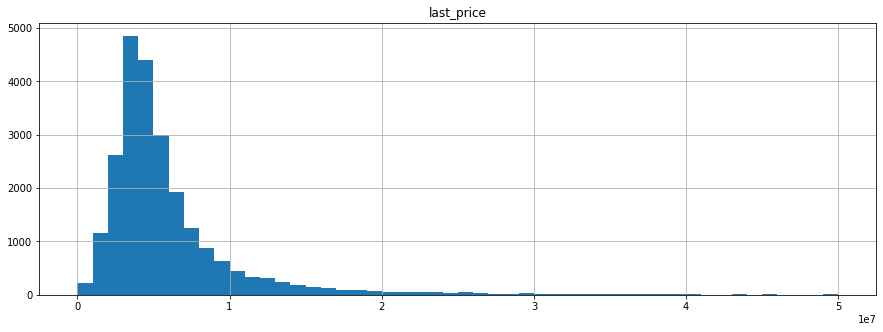

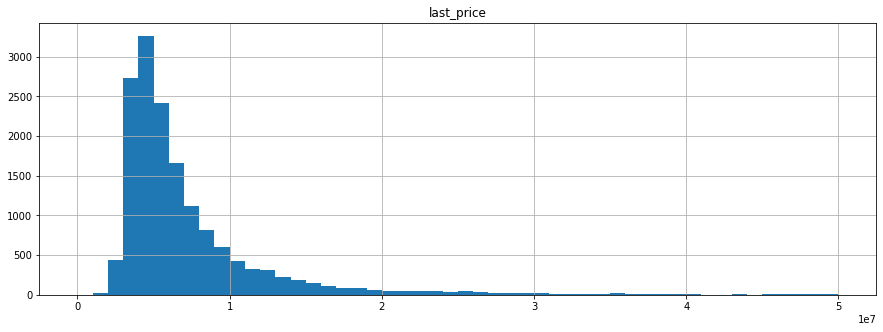

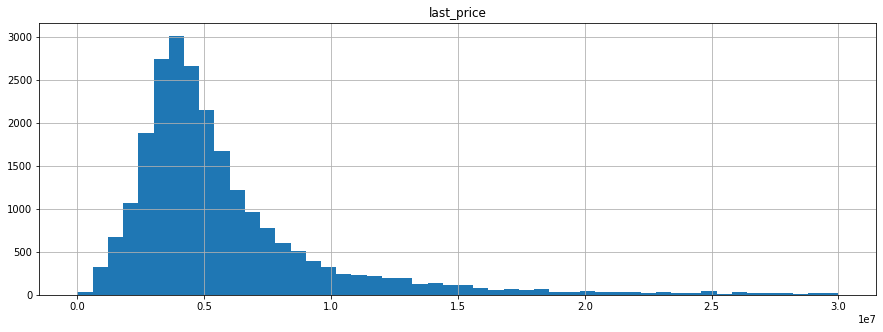

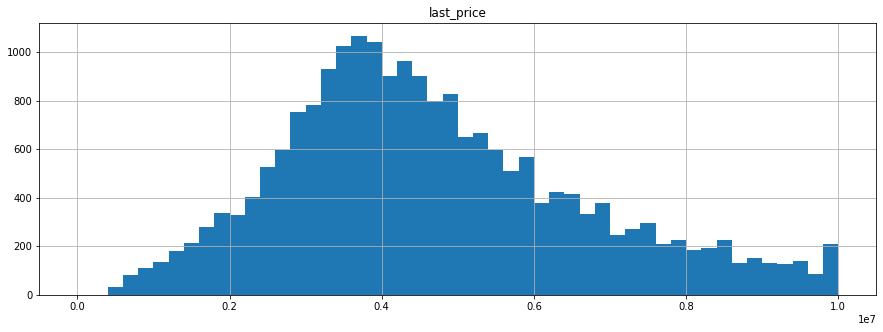

In [ ]:
data.hist('last_price', bins=50, range=(0, 50000000), figsize=(15,5));
data.query('locality_name == "Санкт-Петербург"').hist('last_price', bins=50, range=(0, 50000000), figsize=(15,5));
# ограничим нашу гистограмму 30 миллионами
data.hist('last_price', bins=50, range=(0, 30000000), figsize=(15,5));
# рассмотрим самый объемный отрезок, до 10 миллионов
data.hist('last_price', bins=50, range=(0, 10000000), figsize=(15,5));
# видимо мне очень понравилось строить гистограммы :)

In [ ]:
# Просмотр самых дорогих объектов, после наблюдений, сделанных в пункте 2.4 "rooms"
display(data.loc[(data['last_price']>300000000)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,True,False,False,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,True,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,True,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


**Вывод:**

Была найдена 1 ошибка, исправлена и проверена на соответствие реалиям рынка на примере аналогичных предложений.
Объект 12971 - очевидный выброс

#### Столбец "total_area"

In [ ]:
analysis('total_area')
data['total_area'].describe()

Тип данных float64
Количество пропусков 0
минимальное значение: 12.0 максимальное значение: 900.0
уникальные значения: 
 45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

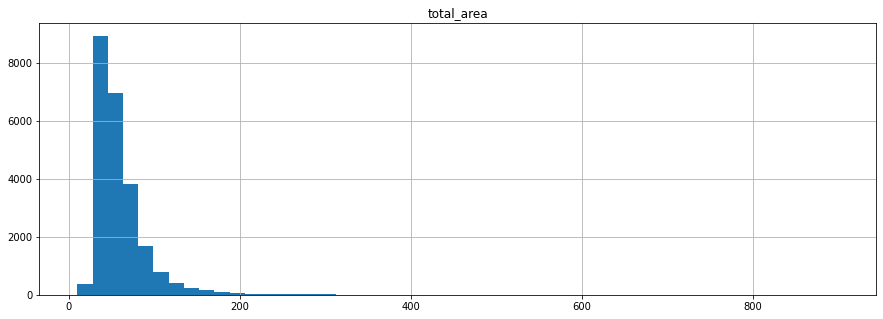

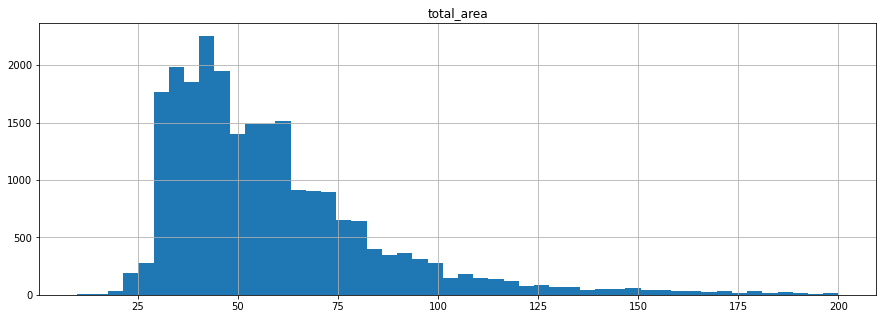

In [ ]:
data.hist('total_area', bins=50, range=(10, 900), figsize=(15,5));
# Ограничемся срезом без премиального жилья
data.hist('total_area', bins=50, range=(10, 200), figsize=(15,5));

**Вывод:**

Проблем со столбцом не выявлено. Однако стоит заметить, что максимальные площади квартир в объявлениях достигают 900 м2. В квартилях (Q3) и близко таких площадей нет, вероятней всего при анализе такие объявления будут отсекаться, как представители объявлений премиального жилья.

#### Столбец "first_day_exposition"

In [ ]:
analysis('first_day_exposition')

Тип данных object
Количество пропусков 0
уникальные значения: 
 2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-03-02T00:00:00      1
2015-11-16T00:00:00      1
2015-12-06T00:00:00      1
2015-03-03T00:00:00      1
2014-12-13T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64


In [ ]:
# Переводим данные в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Проверяем
analysis('first_day_exposition')
data.dtypes

Тип данных datetime64[ns]
Количество пропусков 0
минимальное значение: 2014-11-27 00:00:00 максимальное значение: 2019-05-03 00:00:00
уникальные значения: 
 2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

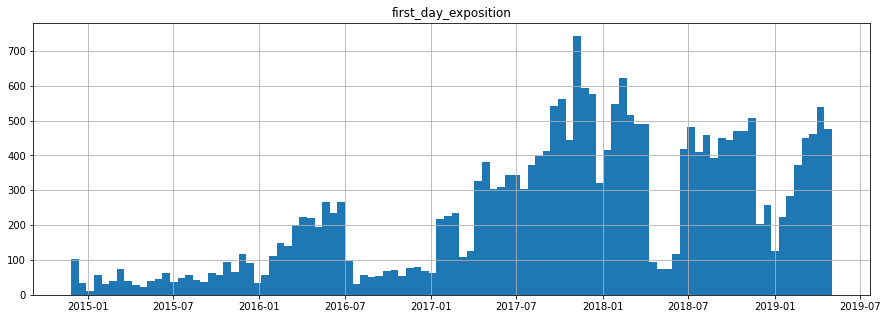

In [ ]:
data.hist('first_day_exposition', bins=100, figsize=(15,5));

**Вывод:**

Данные были переведены в формат datetime64, что понадобиться в дальнейшем анализе

#### Столбец "rooms"

In [ ]:
analysis('rooms')

Тип данных int64
Количество пропусков 0
минимальное значение: 0 максимальное значение: 19
уникальные значения: 
 1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Проверим данные по объявления с количеством комнат 0

In [ ]:
data.query('rooms == 0 and (open_plan == True or studio == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,True,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,True,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,True,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,True,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,True,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,True,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,True,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,True,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,True,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Рассматриваемая недвижимость имеет все признаки квартир-студий или квартир со свободной планировкой.

In [ ]:
# Выборка объектов недмижимость относящихся к студии
# Количество
print(len(data.query('studio == True')))

# Уникальные значения комнат
data.query('studio == True')['rooms'] .value_counts()

149


0    138
1     11
Name: rooms, dtype: int64

Сам принцип квартиры-студии не предполагает деления на комнаты. Допускаю, что часть пользователей по-своему интерпретировали вариант подсчета количество комнат в этих объектах недвижимости.
Для общего вида заменим значение комнат во всех встудиях на "0"

In [ ]:
# Ищем в базе данных все объекты с количеством комнат "1" и типом "студия"
# Присваеваем значение комнат "0"
data.loc[(data['rooms'] == 1) & (data['studio']==True),'rooms'] = 0

# Проверяем
data.query('studio == True')['rooms'].value_counts()

0    149
Name: rooms, dtype: int64

In [ ]:
# Отдельно рассмотрим премиальную недвижимость, на предмет явных артефактов в данных
data.query('rooms >= 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,True,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,True,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,True,False,False,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,True,False,False,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Цена в 420 миллионов, конечно, выбивается из общих данных, но учитывая параметры недвижимости, выглядит жизнеспособной
Но обращает внимание на себя другой факт: в премиальную недвижимость не попал объект с самой высокой стоимостью 763 миллиона.

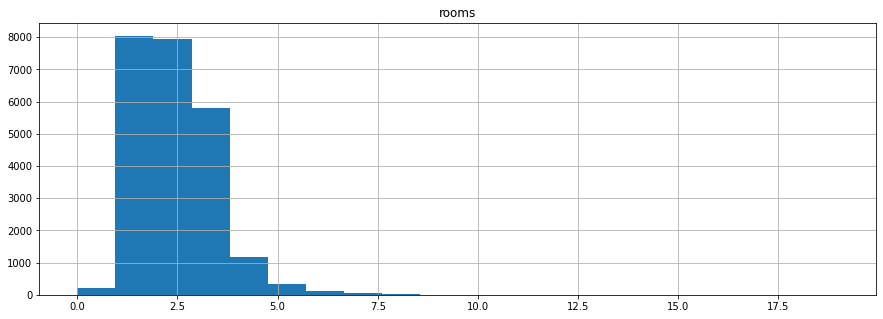

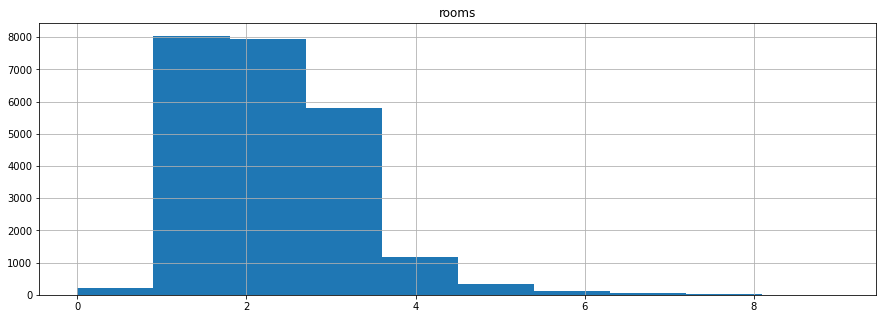

In [ ]:
data.hist('rooms', bins=20, range=(0, 19), figsize=(15,5));
# Уберем из графика немногочисленную премиальную недвижимость
data.hist('rooms', bins=10, range=(0, 9), figsize=(15,5));

**Вывод:**

Проблем по столбцу не выявленно.
Для чистоты данных всем квартирам-студиям было присвоено значение комнат "0"

#### Столбец "ceiling_height"

In [ ]:
analysis('ceiling_height')
data['ceiling_height'].describe()

Тип данных float64
Количество пропусков 9195
минимальное значение: 1.0 максимальное значение: 100.0
уникальные значения: 
 2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [ ]:
# Пропуски заполняю медианными значениями, сгруппированными по количеству комнат,
# что бы избежать массовой записи одного общего медианного значения
data['ceiling_height'] = (data.groupby('rooms')['ceiling_height'].transform(lambda g: g.fillna(g.median())))
# Проверяем пропуски и распределение медианного значения
analysis('ceiling_height')

Тип данных float64
Количество пропусков 1
минимальное значение: 1.0 максимальное значение: 100.0
уникальные значения: 
 2.60    4736
2.50    3515
2.64    3509
2.65    2701
2.70    1574
        ... 
3.76       1
4.90       1
5.20       1
2.89       1
4.65       1
Name: ceiling_height, Length: 183, dtype: int64


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
data.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,True,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [ ]:
data.loc[14498, 'ceiling_height'] = data.loc[data['rooms']>=10, 'ceiling_height'].median()
display(data.loc[14498, 'ceiling_height'])

3.16

Единственный объект недвижимости с 19 комнатами, следовательно медианные значения было брать не от куда. Принял данные высоты потолков по медианному значению премиальной недвижимости (более 10 комнат)

In [ ]:
# Просмотрим значения "ceiling_height" которые выглядит нереальными
display(data.loc[(data['ceiling_height']>20)])
display(data.loc[(data['ceiling_height']<=2)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,True,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,True,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,True,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,True,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,True,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,True,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,True,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,True,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.5,6,True,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.0,4,True,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.6,9,True,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.5,1,True,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,True,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.2,12,True,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5.0,63.9,2,True,False,False,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5.0,20.0,5,False,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37.0,17.4,5,True,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04,3,2.00,5.0,46.0,1,True,False,False,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


Очевидно, что в квартирах не могут быть потолки по 27-32 метра, скорректируем значения, уменьшив их в 10 раз, предполагая, что при заполнении данных была пропущена ","
Объект 22869, с высотой потолков 100 метров, удаляем из данных
Что касается объектов недвижимости с высотой потолков не больше 2 метров - эти значения явно не могут быть реальными, т.к. нарушают СНиПы (Строительные Нормы и Правила). Считаю будет целесообразным удалить эти данные.

In [ ]:
# Удаляем
data.drop(index=data.query('ceiling_height == 100').index, inplace=True)
# Проверяем
display(data.loc[(data['ceiling_height']>50)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [ ]:
# Удаляем объекты с некорректным указанием высоты потолков (менее 2 метров)
data.drop(index=data.query('ceiling_height <=2').index,inplace=True)
# Проверяем
display(data.loc[(data['ceiling_height']<=2)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [ ]:
# Корректируем высоту потолков для некорректных данных
data.update(data[(data['ceiling_height'] > 20)]['ceiling_height']/10)
# Проверяем
display(data.loc[(data['ceiling_height']>20)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


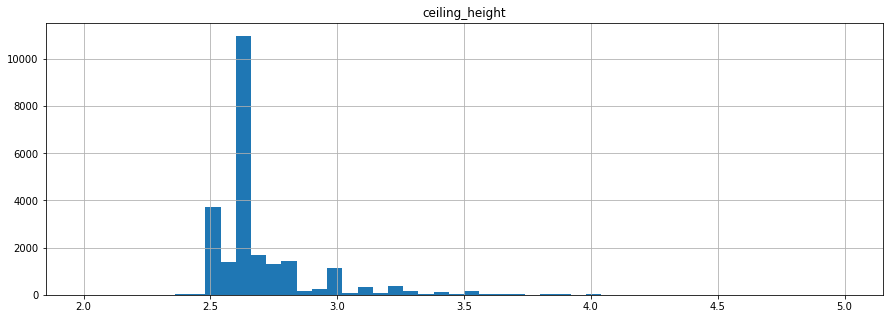

In [ ]:
data.hist('ceiling_height', bins=50, range=(2, 5), figsize=(15,5));

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Дополнительно рассмотрим оставшиеся, аномально высокие значения в столбце "ceiling_height"
</div>

In [ ]:
# Проверяем наличие
display(data.query('ceiling_height > 7'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,True,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,True,False,False,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,True,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,True,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
17496,15,6700000.0,92.9,2019-02-19,3,20.0,17.0,53.2,14,True,False,False,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,True,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


In [ ]:
# Удаляем данные, так как очевидного способо их корректировки не вижу
data.drop(index=data.query('ceiling_height > 7').index,inplace=True)
# Проверяем
display(data.query('ceiling_height > 7'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


**Вывод:**

Были заполнены пропуски медианными значениями, исправлены неправдоподобные данные, удалены выбросы, исправить которые не представлялось возможным.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Так же были удалены данные для объектов, где указанные восота потолков превышала 7 метров, что является перебором даже для двухуровнего пентхауса
</div>

#### Столбец "floors_total"

In [ ]:
analysis('floors_total')
data['floors_total'].describe()

Тип данных float64
Количество пропусков 86
минимальное значение: 1.0 максимальное значение: 60.0
уникальные значения: 
 5.0     5780
9.0     3760
16.0    1373
12.0    1360
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     831
3.0      668
7.0      592
14.0     552
18.0     504
24.0     469
8.0      390
2.0      381
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64


count    23591.000000
mean        10.673477
std          6.595893
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Восстановить данные этажей не представляется возможным. Пропусков относительно мало, а значит мы можем, ради целостности данных, удалить их.

In [ ]:
data = data.dropna(subset=['floors_total'])
# Проверяем
data['floors_total'].isna().sum()

0

In [ ]:
# Переведем данные в формат Int
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].dtypes

dtype('int64')

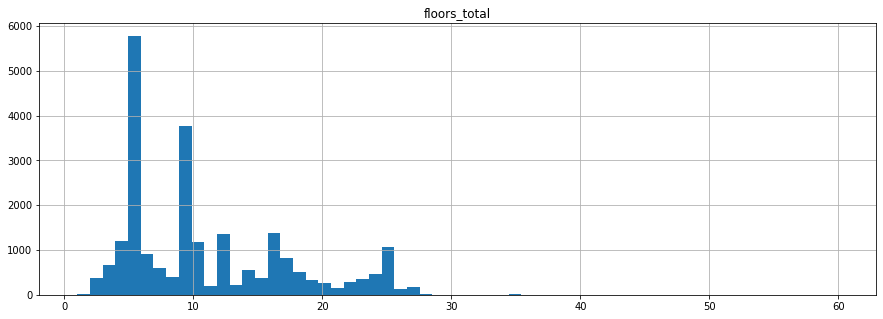

In [ ]:
data.hist('floors_total', bins=60, range=(1, 60), figsize=(15,5));

**Вывод:**

Были удалены пропуски, которые невозможно было восстановить
Удалили данные с технической ошибкой
Изменили формат данных в колонке, на целые числа,

#### Столбец "living_area"

In [ ]:
analysis('living_area')
data['living_area'].describe()

Тип данных float64
Количество пропусков 1868
минимальное значение: 2.0 максимальное значение: 409.7
уникальные значения: 
 18.00    882
17.00    674
30.00    598
16.00    484
20.00    480
        ... 
50.26      1
43.81      1
54.43      1
86.10      1
16.74      1
Name: living_area, Length: 1769, dtype: int64


count    21723.000000
mean        34.469183
std         22.042372
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Заполняем пропуски медианными значениями, группировку делаем по количеству комнат

In [ ]:
data['living_area'] = (data.groupby('rooms')['living_area'].transform(lambda g: g.fillna(g.median())))
analysis('living_area')

Тип данных float64
Количество пропусков 0
минимальное значение: 2.0 максимальное значение: 409.7
уникальные значения: 
 18.00    893
17.60    742
30.50    699
17.00    674
30.00    598
        ... 
50.26      1
43.81      1
54.43      1
86.10      1
16.74      1
Name: living_area, Length: 1771, dtype: int64


Проверим сгенерированные жилой площади на соответствие общей площади

In [ ]:
# Найдем количество объявлений, где общая площадь меньше сумм площадей жилой и кухни
display(data.query('(living_area + kitchen_area) > total_area')['living_area'].count())

73

Избавимся от логических ошибок, связанных с несоответствием сумм площадей

In [ ]:
# Удаляем нелогичные значения
data.drop(index=data.query('(living_area + kitchen_area) > total_area').index,inplace=True)
# Проверка
display(data.query('(living_area + kitchen_area) > total_area')['living_area'].count())

0

In [ ]:
# Рассмотрим объявления с маленькой жилой площадью
display(data.query('living_area <= 5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.64,17,3.0,17,True,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,True,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000.0,22.0,2018-08-11,0,2.75,25,5.0,8,True,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01,0,2.75,24,2.0,22,True,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,True,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Из рассмотренных объектов (с малой жилой площадью) логически она соответствует только объектам 17582 и 21758, т.к. они являются студиями.
И точно жилая площадь не может составлять 3 м2 в квартиле общей площадью 139 м2.
Вероятней всего пользователи ввели некорректные данные, удаляем

In [ ]:
# Удаляем
data.drop(index=data.query('living_area <= 5 and studio != True').index,inplace=True)
# Проверяем
display(data.query('living_area <= 5'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17582,11,2680000.0,22.0,2018-08-11,0,2.75,25,5.0,8,True,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01,0,2.75,24,2.0,22,True,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0


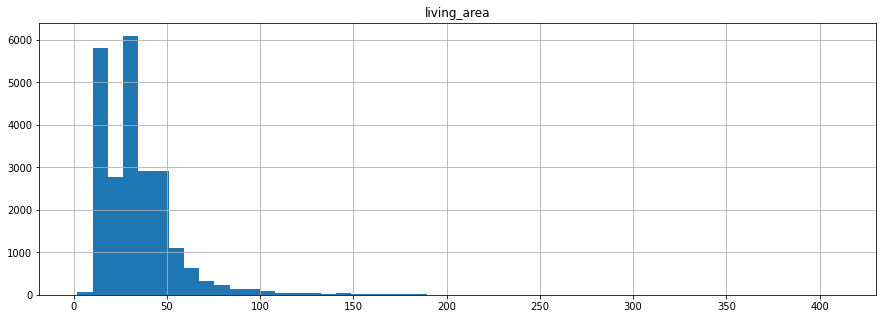

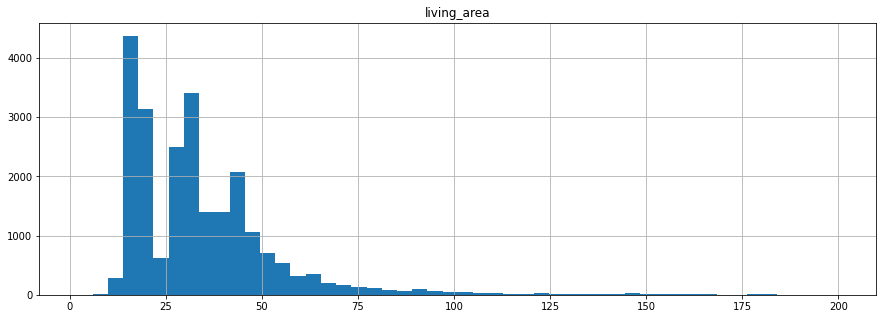

In [ ]:
data.hist('living_area', bins=50, range=(2, 410), figsize=(15,5));
data.hist('living_area', bins=50, range=(2, 200), figsize=(15,5));

**Вывод:**

Пропуски были заполнены медианными значениями, сгруппированными по количеству комнат. Логические ощибки были удалены

#### Стобец "floor"

In [ ]:
analysis('floor')
data['floor'].describe()

Тип данных int64
Количество пропусков 0
минимальное значение: 1 максимальное значение: 33
уникальные значения: 
 2     3356
3     3056
1     2906
4     2788
5     2603
6     1292
7     1211
8     1069
9     1042
10     681
11     519
12     515
13     371
15     337
14     331
16     313
17     223
18     174
19     143
21     121
22     112
20     108
23      99
24      60
25      45
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64


count    23515.000000
mean         5.870933
std          4.869852
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

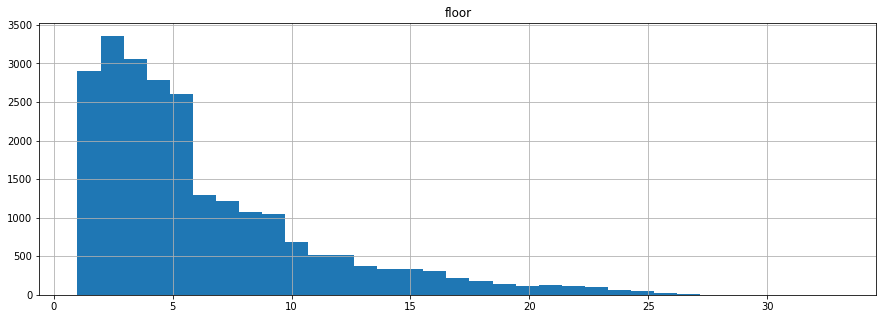

In [ ]:
data.hist('floor', bins=33, range=(1, 33), figsize=(15,5));

**Вывод:**

Ошибок в данном столбце не замечено

#### Столбец "is_apartment"

In [ ]:
analysis('is_apartment')
data['is_apartment'].describe()

Тип данных bool
Количество пропусков 0
минимальное значение: False максимальное значение: True
уникальные значения: 
 True     20811
False     2704
Name: is_apartment, dtype: int64


count     23515
unique        2
top        True
freq      20811
Name: is_apartment, dtype: object

**Вывод:**

Ошибок в данном столбце не замечено

#### Столбец "studio"

In [ ]:
analysis('studio')
data['studio'].describe()

Тип данных bool
Количество пропусков 0
минимальное значение: False максимальное значение: True
уникальные значения: 
 False    23369
True       146
Name: studio, dtype: int64


count     23515
unique        2
top       False
freq      23369
Name: studio, dtype: object

**Вывод:**

Ошибок в данном столбце не замечено

#### Столбец "open_plan"

In [ ]:
analysis('open_plan')
data['open_plan'].describe()

Тип данных bool
Количество пропусков 0
минимальное значение: False максимальное значение: True
уникальные значения: 
 False    23448
True        67
Name: open_plan, dtype: int64


count     23515
unique        2
top       False
freq      23448
Name: open_plan, dtype: object

**Вывод:**

Ошибок в данном столбце не замечено

#### Столбец "kitchen_area"

In [ ]:
analysis('kitchen_area')
data['kitchen_area'].describe()

Тип данных float64
Количество пропусков 2227
минимальное значение: 1.3 максимальное значение: 112.0
уникальные значения: 
 6.00     1296
10.00    1260
8.00     1105
9.00     1094
7.00     1060
         ... 
28.64       1
7.78        1
7.12        1
13.73       1
16.74       1
Name: kitchen_area, Length: 952, dtype: int64


count    21288.000000
mean        10.550525
std          5.889433
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Заполним пропуски данных по медианным значениям, с группировкой по количеству комнат

In [ ]:
data['kitchen_area'] = (data.groupby('rooms')['kitchen_area'].transform(lambda g: g.fillna(g.median())))
print('Количество объявлений с пропущенными значениями площади кухни', data['kitchen_area'].isna().sum())
# локализуем пропуски
print('Количество объявлений с 0 комнатами:', data.query('rooms == 0')['rooms'].count())


Количество объявлений с пропущенными значениями площади кухни 205
Количество объявлений с 0 комнатами: 205


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Ранее мы определили квартиры студии и квартиры со свободной планировкой, как объекты с 0 комнатами, во всех этих объявлениях отсутствует площадь кухни, что в принципе логично, т.к. отдельного выделенного помещения нет.
Считаю целесообразным указать в этих объявлениях площадь кухни "0"

In [ ]:
# подтверждаем гипотезу об отсутствии данных именно в студиях и квартирах свободной планировки
display(data.query('(kitchen_area.isna() and studio == True) or (kitchen_area.isna() and open_plan == True)'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.75,24,15.50,2,True,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.75,14,17.00,1,True,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.75,17,24.75,4,True,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.75,26,24.30,19,True,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.75,10,18.00,7,True,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.75,25,18.00,16,True,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.75,24,18.00,4,True,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.75,19,18.00,8,True,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.75,9,18.00,8,True,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [ ]:
# Устанавливаем площадь кухни в квартирах студиях и квартирах свободной планировки на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)
# Проверяем количество пропусков
display(data['kitchen_area'].isna().sum())

0

In [ ]:
# Повторяем проверку на адекватность соотношения площадей, указанных в объявлениях
display(data.query('(living_area + kitchen_area) > total_area')['kitchen_area'].count())

204

In [ ]:
# Удаляем нелогиченые, с точки зрения площадей, объявления
data.drop(index=data.query('(living_area + kitchen_area) > total_area').index,inplace=True)
# Проверяем
display(data.query('(living_area + kitchen_area) > total_area')['kitchen_area'].count())

0

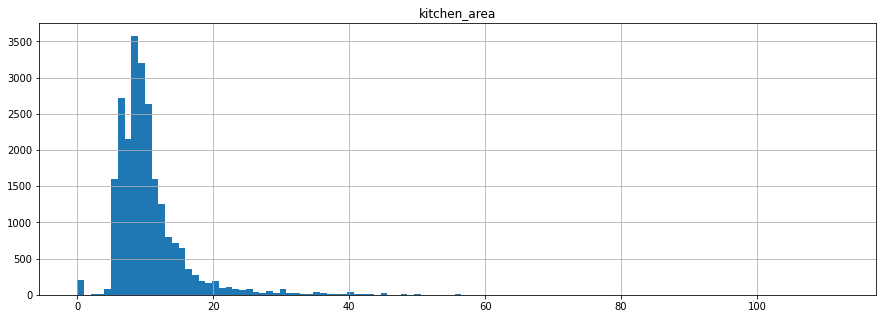

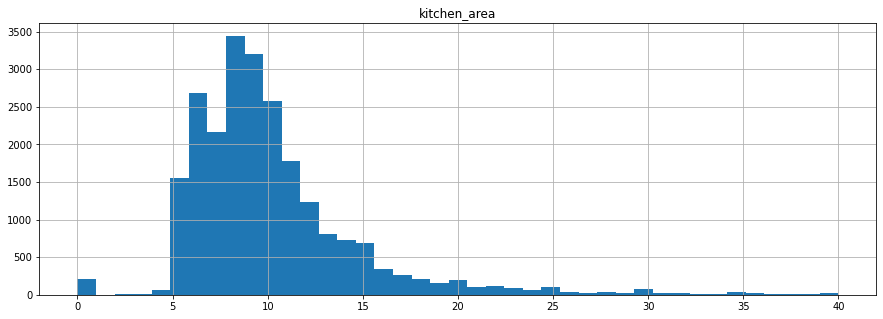

In [ ]:
data.hist('kitchen_area', bins=113, range=(0, 112), figsize=(15,5));
data.hist('kitchen_area', bins=41, range=(0, 40), figsize=(15,5));

**Вывод:**

Были заполнены пропуски в данных, проверены на логику получившиеся результаты. Часть сгенерированных значений пришлось удалить, но в итоге из 2229 пропусков безвозвратно были удалены 204.

#### Столбец "balcony"

In [ ]:
analysis('balcony')
data['balcony'].describe()

Тип данных float64
Количество пропусков 11302
минимальное значение: 0.0 максимальное значение: 5.0
уникальные значения: 
 1.0    4168
0.0    3665
2.0    3613
5.0     301
4.0     183
3.0      79
Name: balcony, dtype: int64


count    12009.000000
mean         1.154801
std          1.070827
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Логически пропуски в этом столбце можно объяснить следующим образом: пользователь не заполнял графу, если балкон отсутствует, а значит мы можем указать вместо пропуска "0"

Так же изменим формат данных на 'int'

In [ ]:
# Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(0)
# Проверяем
data['balcony'].isna().sum()

0

In [ ]:
# Меняем формат данных
data['balcony'] = data['balcony'].astype('int')
# Проверяем
data['balcony'].dtypes

dtype('int64')

**Вывод:**

Пропущенные значения были заменены, формат данных был изменен на подходящий

#### Столбец "locality_name"

In [ ]:
analysis('locality_name')
data['locality_name'].describe()

Тип данных object
Количество пропусков 47
уникальные значения: 
 Санкт-Петербург            15487
посёлок Мурино               497
посёлок Шушары               434
Всеволожск                   390
Пушкин                       369
                           ...  
деревня Русско                 1
деревня Щеглово                1
деревня Пчева                  1
деревня Хапо-Ое                1
поселок станции Лужайка        1
Name: locality_name, Length: 363, dtype: int64


count               23264
unique                363
top       Санкт-Петербург
freq                15487
Name: locality_name, dtype: object

В данном случае пропуски можно только удалить

In [ ]:
# Удаляем пропуски
data = data.dropna(subset=['locality_name'])
# Проверяем
data['locality_name'].isna().sum()

0

Поработаем с дубликатами:

In [ ]:
# Приводим все названия к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
# Заменяем во всех названиях "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# Убираем неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
# Смотрим количество уникальных значений
print('Уникальных значений:', len(data['locality_name'].unique()))
# Проверяем наличие явных дубликатов
print('Количество явных дубликатов', data.duplicated().sum())

Уникальных значений: 322
Количество явных дубликатов 0


**Вывод:**

Объекты с пропусками были удалены. Количество уникальных наименований локаций было сокращено с 363 до 322, путем приведения названий к общему виду

#### Столбец "airports_nearest"

In [ ]:
analysis('airports_nearest')
data['airports_nearest'].describe()

Тип данных float64
Количество пропусков 5400
минимальное значение: 0.0 максимальное значение: 84869.0
уникальные значения: 
 37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
48769.0     1
13720.0     1
44471.0     1
26487.0     1
20875.0     1
Name: airports_nearest, Length: 8211, dtype: int64


count    17864.000000
mean     28825.555195
std      12643.568332
min          0.000000
25%      18574.750000
50%      26770.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Минимальное значение "0", очевидно что такого быть не может, проверим объекты, которые непрадоподобно близко расположены к аэропортам

In [ ]:
display(data.query('airports_nearest <= 100'))
# Удаляем значение строки, позже перезапишем на медианное, это позволит сохранить остальные данные объявления
data.loc[21085, 'airports_nearest'] = np.nan
# Проверяем
display(data.loc[21085, 'airports_nearest'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,True,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


nan

In [ ]:
# Заполняем пропуски медианным значением по этой же колонке
# data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
# Проверяем количество пропусков
data['airports_nearest'].isna().sum()

5401

**Вывод:**

Пропуски были заполнены медианным значением, группировка по населенным пунктам здесь не помогла бы, т.к. слишком мало заполненных данных.
Объект с некоректным данными был сохраненых с медианным значением по рассматриваемой колонке

upd. отменил заполняемость по медиане, объективность имеющихся данных ломается, оставил пропуски

#### Столбец "city_centers_nearest"

In [ ]:
analysis('city_centers_nearest')
data['city_centers_nearest'].describe()

Тип данных float64
Количество пропусков 5377
минимальное значение: 181.0 максимальное значение: 65968.0
уникальные значения: 
 8460.0     61
20802.0    31
10720.0    30
8434.0     27
8370.0     26
           ..
11575.0     1
3205.0      1
12747.0     1
8767.0      1
4234.0      1
Name: city_centers_nearest, Length: 7589, dtype: int64


count    17887.000000
mean     14203.709286
std       8630.816065
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [ ]:
# Заполняем пропуски медианным значением по этой же колонке
# data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())
# Проверяем количество пропусков
data['city_centers_nearest'].isna().sum()

5377

**Вывод:**

По аналогии с предыдущим пунктом, сделали заполняемость пропусков медианным значением

upd. Отменил заполнение медианным значением, ломается объективность имеющихся данных

#### Столбец "parks_around_3000"

In [ ]:
analysis('parks_around_3000')
data['parks_around_3000'].describe()

Тип данных float64
Количество пропусков 5376
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.0    9927
1.0    5604
2.0    1718
3.0     639
Name: parks_around_3000, dtype: int64


count    17888.000000
mean         0.612534
std          0.802365
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

По аналогии с предобраткой данных по столбцу балконов, вероятней всего данные не указаны пользователем, если они соответствуют "0". В защиту своего довода скажу: наличие водоема рядом это определенно положительная сторона квартиры, и пользователь заполнявший объявление (он же продавец) скорее всего не забыл бы указать этот пункт.

In [ ]:
# Заменяем пропущенные значения на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
# Проверяем
data['parks_around_3000'].isna().sum()

0

Устанавливаем формат данных на 'int', т.к. количество парков можем быть только целым числом

In [ ]:
# Меняем формат данных
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
# Проверяем
data['parks_around_3000'].dtypes

dtype('int64')

**Вывод:**

Пропуски были заменены на значение "0". Формат данных изменили на целые числа

#### Столбец "parks_nearest"

In [ ]:
analysis('parks_nearest')
data['parks_nearest'].describe()

Тип данных float64
Количество пропусков 15299
минимальное значение: 1.0 максимальное значение: 3190.0
уникальные значения: 
 441.0     67
392.0     41
173.0     41
456.0     40
471.0     31
          ..
863.0      1
828.0      1
1909.0     1
1049.0     1
929.0      1
Name: parks_nearest, Length: 993, dtype: int64


count    7965.000000
mean      490.471563
std       341.319452
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Заполним пропуски медианными значениями с группировкой по столбцу количества парков в радиусе 3 км.

In [ ]:
data['parks_nearest'] = (data.groupby(
    'parks_around_3000')['parks_nearest'].transform(lambda g: g.fillna(g.median())))
# Проверяем
data['parks_nearest'].isna().sum()

0

**Вывод:**

Пропуски в обрабатываемом столбцы были заполнены медианными значениями сгруппированными со столбца "количество парков в ближайших 3 км".

#### Столбец "ponds_around_3000"

In [ ]:
analysis('ponds_around_3000')
data['ponds_around_3000'].describe()

Тип данных float64
Количество пропусков 5376
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.0    8950
1.0    5592
2.0    1868
3.0    1478
Name: ponds_around_3000, dtype: int64


count    17888.000000
mean         0.769343
std          0.939207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

Доводы те же самые, что и с парками. Раз пользователь не указал, значит, с большой вероятностью, их количество равно "0"

In [ ]:
# Заменяем пропущенные значения на 0
data.loc[data['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0
# Проверяем
data['ponds_around_3000'].isna().sum()

0

Устанавливаем формат данных на 'int', т.к. количество водоемов можем быть только целым числом

In [ ]:
# Меняем формат данных
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
# Проверяем
data['ponds_around_3000'].dtypes

dtype('int64')

**Вывод:**

Пропуски были заменены на значение "0". Формат данных изменили на целые числа

#### Столбец "ponds_nearest"

In [ ]:
analysis('ponds_nearest')
data['ponds_nearest'].describe()

Тип данных float64
Количество пропусков 14326
минимальное значение: 13.0 максимальное значение: 1344.0
уникальные значения: 
 427.0     69
454.0     41
153.0     40
433.0     39
474.0     37
          ..
59.0       1
1069.0     1
1270.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1095, dtype: int64


count    8938.000000
mean      518.292459
std       277.558785
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

По аналогии с парками: заполним пропуски медианными значениями с группировкой по столбцу количества водоемов в радиусе 3 км.

In [ ]:
# недостаточно данных
# data['ponds_nearest'] = (data.groupby(
#    'ponds_around_3000')['ponds_nearest'].transform(lambda g: g.fillna(g.median())))
# Проверяем
data['ponds_nearest'].isna().sum()

14326

**Вывод:**

Пропуски в обрабатываемом столбцы были заполнены медианными значениями сгруппированными со столбца "количество водоемов в ближайших 3 км".

#### Столбец "days_exposition"

In [ ]:
analysis('days_exposition')
data['days_exposition'].describe()

Тип данных float64
Количество пропусков 3146
минимальное значение: 1.0 максимальное значение: 1580.0
уникальные значения: 
 45.0      846
60.0      528
7.0       228
30.0      208
90.0      198
         ... 
1201.0      1
818.0       1
969.0       1
1147.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64


count    20118.000000
mean       181.472363
std        220.336402
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Рассмотрим пропуски через призму даты размещения объявления. Вероятнее всего большинство пропусков - активные, на момент создания базы данных, объявления

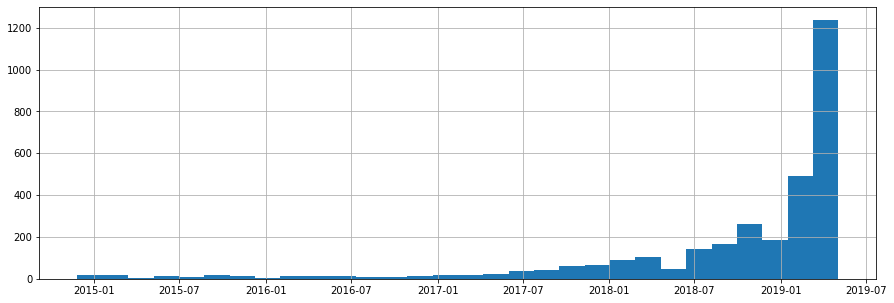

In [ ]:
# Объявления с пропусками
days_exposition_na = data.query('days_exposition.isna()')

# Гистограмма по дате размещения объявлений:
days_exposition_na['first_day_exposition'].hist(bins=30, figsize=(15, 5));

На гистрограмме видно, что подовляющее большинство объявлений с пропуском в столбце 'days_exposition' были выложены совсем недавно. Заполним пропуски из расчета, что эти объявления активны на момент создания последнего объявления (допустим, что это дата и есть дата выгрузки базы данных). Следовательно значением будет разница между максимальной датой и first_day_exposition, выраженная в днях

In [ ]:
# Последняя дата
max_dt = data['first_day_exposition'].max()
# Pаполняем пропуски разностью
data.loc[data['days_exposition'].isna(),
       'days_exposition'] = (max_dt - data.loc[data['days_exposition'].isna(),
       'first_day_exposition']).dt.days
# Проверяем
display(data['days_exposition'].isna().sum())

0

**Вывод:**

Пропуски значений столбца заполнены разностью между значением first_day_exposition и максимальной датой в днях поля first_day_exposition.

Вероятная причина пропусков - объявления не были закрыты.

#### Добавляем столбец цены квадратного метра

In [ ]:
# Добавляем столбец price_sq_meter с расчетом 1 м2
data['price_sq_meter'] = data['last_price'] / data['total_area']

#### Добавляем столбцы дня недели, месяца и года публикации объявления

In [ ]:
# Добавление столбца с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# Добавление столбца с месяцем публикации объявления
data['monht_exposition'] = data['first_day_exposition'].dt.month
# Добавление столбца с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Присваивание категории этажа квартиры (первый, последний и другой)

In [ ]:
# Функция, определяющая категорию этажа:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# Применяем метод apply и функцию floor_cat к созданному столбцу floor_group:
data['floor_group'] = data.apply(floor_cat, axis=1)

#### Добавление столбца соотношения жилой и общей площади, а также площади кухни к общей площади

In [ ]:
# Создаем столбец living_area_ratio и заполняем его соотношением жилой и общей площади:
data['living_area_ratio'] = data['living_area'] / data['total_area']
# Создаем столбец kitchen_area_ratio и заполняем его соотношением площади кухни и общей площади:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [ ]:
# Проверяем добавление столбцов
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,monht_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,57.0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,True,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,3127.0,0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,True,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,False,False,9.5,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


In [ ]:
round(data.describe(), 3)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,monht_exposition,year_exposition,living_area_ratio,kitchen_area_ratio
count,23264.000,2.326400e+04,23264.000,23264.000,23264.000,23264.000,23264.000,23264.000,23264.000,23264.000,17863.000,17887.000,23264.000,23264.00,23264.000,8938.000,23264.000,23264.000,23264.000,23264.000,23264.000,23264.000,23264.000
mean,9.902,6.567042e+06,60.586,2.074,2.695,10.651,34.345,5.863,10.357,0.596,28827.169,14203.709,0.471,2224.32,0.592,518.292,186.534,99347.001,2.568,6.404,2017.370,0.561,0.185
std,5.681,1.092634e+07,35.718,1.077,0.227,6.573,21.704,4.854,5.732,0.961,12642.082,8630.816,0.749,1266.91,0.885,277.559,234.207,50222.034,1.787,3.493,1.038,0.106,0.073
min,0.000,4.300000e+05,14.000,0.000,2.200,1.000,2.000,1.000,0.000,0.000,6450.000,181.000,0.000,1.00,0.000,13.000,0.000,7962.963,0.000,1.000,2014.000,0.036,0.000
25%,6.000,3.450000e+06,40.000,1.000,2.600,5.000,18.500,2.000,7.100,0.000,18575.500,9238.000,0.000,597.75,0.000,294.000,43.000,76559.001,1.000,3.000,2017.000,0.489,0.133
50%,9.000,4.650000e+06,52.000,2.000,2.640,9.000,30.330,4.000,9.000,0.000,26770.000,13101.000,0.000,3127.00,0.000,503.000,95.000,94936.709,3.000,6.000,2017.000,0.565,0.171
75%,14.000,6.800000e+06,70.000,3.000,2.700,16.000,42.700,8.000,11.500,1.000,37313.000,16293.000,1.000,3127.00,1.000,730.000,238.000,114192.496,4.000,10.000,2018.000,0.636,0.230
max,50.000,7.630000e+08,900.000,19.000,6.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.00,3.000,1344.000,1618.000,1907500.000,6.000,12.000,2019.000,1.000,0.725


In [ ]:
# Переводим расстояние до центра города в километры
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

**Вывод по пунктам 2.22 - 2.25:**

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа, соотношения жилой площади и площади кухни к общей.

**Выводы по разделу 2:**

Были произведены следующие замены по пропускам:

- медианой по группам значений либо общей медианой по всем значениям,
- там, где логически это возможно – конкретными значениями ( например False, 0)
- восстановлены данные, где это возможно (ceiling_height как пример, где пересчитали данные на корректные)
- пропуски значений столбца days_exposition заполнены разностью между значением first_day_exposition и максимальной датой в днях поля first_day_exposition (скорее всего объявления с пропусками имеют статус незакрытых)

В случаях , когда заполнение невозможно, строки были удалены (отсутствие наименования населенного пункта в locality_name, количество этажей в доме , floors_total)

Значения столбца locality_name категоризированы по наименованиям населенных пунктов (названия приведены к единобразию)

Вероятные причины пропусков:

- незаполнение поля клиентом в случае отсутствия информации
- сбор данных из разных источников с изначально отличающейся структурой данных
- сбой при выгрузке данных

### Проведите исследовательский анализ данных

#### Исследование площадей

Рассмотрим тенденции предложений через призму площади квартир. На гистограммах отобразим общие и жилые площади

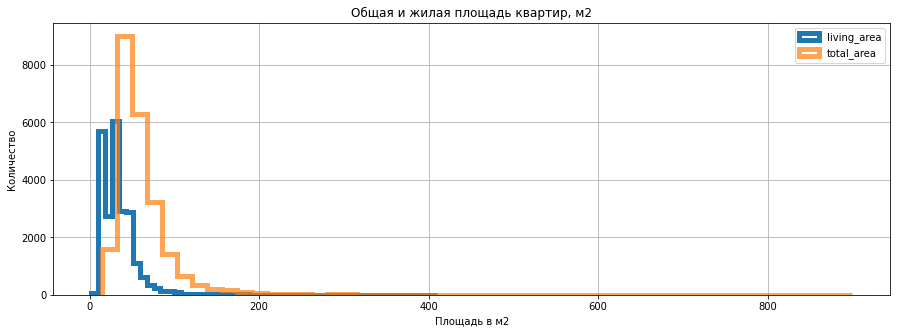

In [ ]:
# Общая и жилая площадь
living_area_hist = data['living_area'].plot(kind='hist', y='total_area',
                histtype='step',bins=50,grid=True, figsize=(15, 5), legend=True,alpha=1,
                linewidth=5
                )
total_area_hist = data['total_area'].plot(kind='hist', y='total_area',
                histtype='step',bins=50,grid=True, legend=True,alpha=0.7,
                title='Общая и жилая площадь квартир, м2',linewidth=5, ax=living_area_hist
                 ).set(xlabel='Площадь в м2', ylabel='Количество')


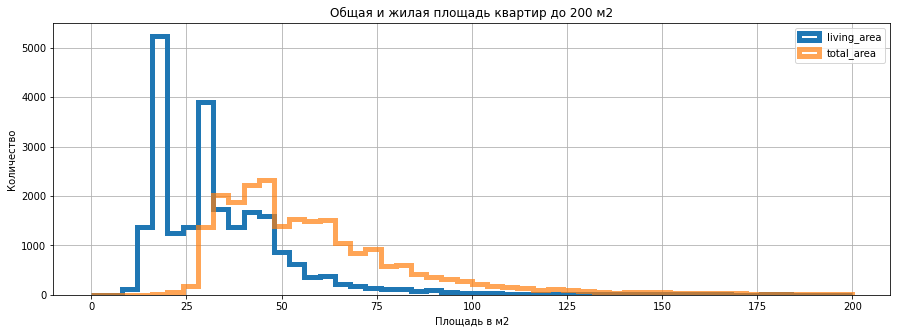

In [ ]:
# Общая и жилая площадь, до 200 м2
living_area_hist = data['living_area'].plot(kind='hist', y='total_area',
                histtype='step',bins=50,grid=True, figsize=(15, 5), legend=True,alpha=1,
                linewidth=5, range= (0, 200)
                )
total_area_hist = data['total_area'].plot(kind='hist', y='total_area',
                histtype='step',bins=50,grid=True, legend=True,alpha=0.7,
                title='Общая и жилая площадь квартир до 200 м2',linewidth=5,
                ax=living_area_hist, range= (0, 200)).set(xlabel='Площадь в м2',
                ylabel='Количество')

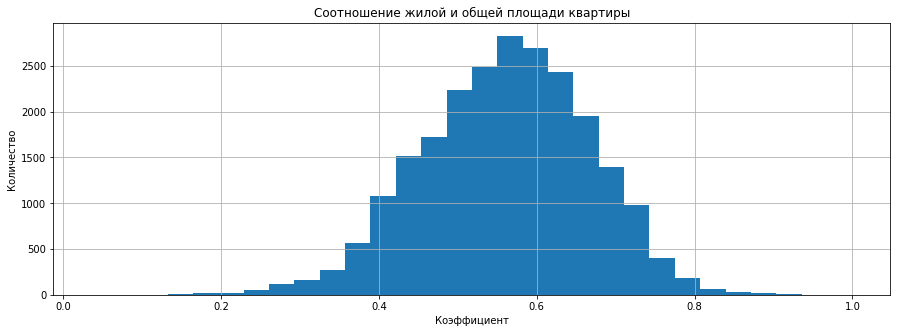

In [ ]:
# Соотношение жилой площади к общей
data['living_area_ratio'].hist(bins=30, figsize=(15, 5)).set(title='Соотношение жилой и общей площади квартиры',
    xlabel='Коэффициент', ylabel='Количество');

На гистограмме видим распределение с пиком в соотношении 50-60%.
Что  характерно для небольших по площади квартир эконом-класса, когда нежилое пространство занимает подавляющую площадь квартиры и имеет тенденцию к уменьшению с увеличением общей площади.
В целом - распределение выглядит нормальным.
При этом, для целостности общей картины считаю целесообразным убрать из исследования данные по квартирам свыше 200 м2, т.к. это премиальная недвижимость, в которой формируется цена не только из данных которые у нас имеются, а при общем рассмотрении искажают общие данные
Так же считаю целесообразным отбросить квартиры площадью ниже 10 м2, это тяжело назвать даже студией.

In [ ]:
print('Жилая площадь меньше 10 м2: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше 200 м2: ',data.query('living_area > 200')['living_area'].count())
# Удаляем
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

Жилая площадь меньше 10 м2:  22
Жилая площадь больше 200 м2:  30


Рассмотрим размеры площади кухни:

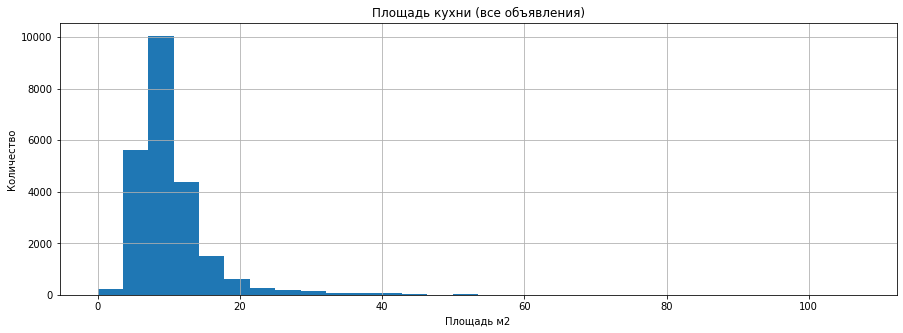

In [ ]:
data['kitchen_area'].hist(bins=30, figsize=(15, 5)).set(title='Площадь кухни (все объявления)',
    xlabel='Площадь м2', ylabel='Количество');

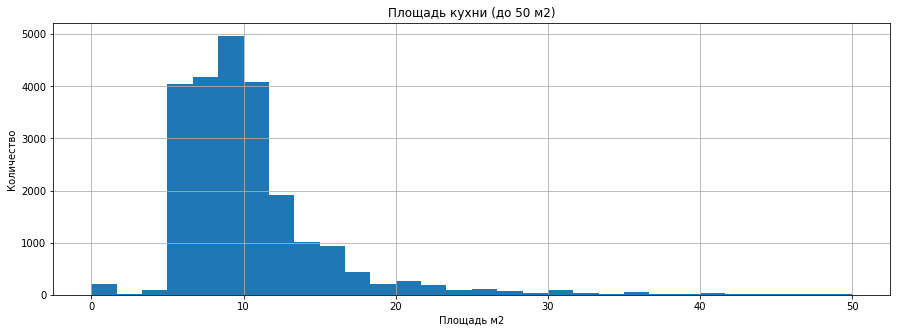

In [ ]:
data['kitchen_area'].hist(bins=30, figsize=(15, 5), range=(0, 50)).set(title='Площадь кухни (до 50 м2)',
    xlabel='Площадь м2', ylabel='Количество');

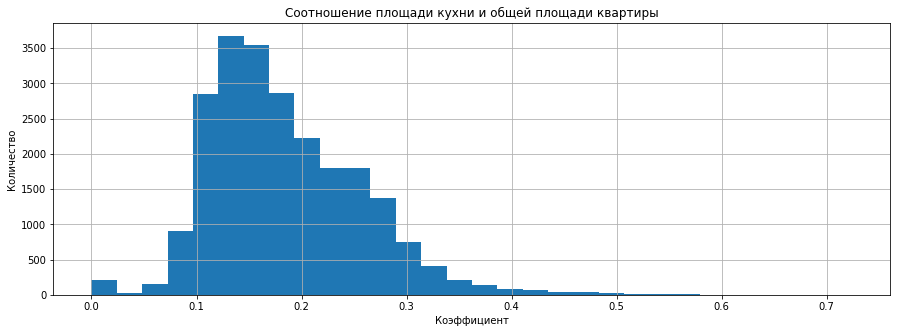

In [ ]:
# Оотношение площади кухни к общей
data['kitchen_area_ratio'].hist(bins=30, figsize=(15, 5)).set(title='Соотношение площади кухни и общей площади квартиры',
    xlabel='Коэффициент', ylabel='Количество');

По аналогии с удалением объявлений премиального характера (в рамках рассмотрения общей площади квартиры), считаю целесообразным удалить малочисленные объявления, в которых указана площадь кухни более 45 м2.
Отдельный пик - площадь кухонь с 0 м2, но, как мы помним из прошлых операций, этой графе соответствуют все квартиры студии и квартиры со свободной планировкой, их оставляем

In [ ]:
print('Площадь кухни больше 45 м2: ',data.query('kitchen_area > 45')['kitchen_area'].count())
# Удаляем
data.drop(index=data.query('kitchen_area > 45').index,inplace=True)

Площадь кухни больше 45 м2:  61


**Вывод:**

В объявлениях представлены объекты недвижимости площадью от 12 до 900 м2. В основном это жилье общей площадью от 30 до 100 м2, с наблюдаемым пиком в зоне 30-50 м2 и несколько меньшему по количеству объявлений сегменту 50-75 м2

В жилой площади квартиры преобладает диапазон 15-35 м2, и с несколько меньшим пиком в диапазоне 40-50 м2.

Диапазон площади кухни - в основном от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры, которые очень распространены в наших городах и являются типичными для среднестатистической квартиры эконом-класса.
Отдельно выведены квартиры студии и квартиры со свободной планировкой, они (и только они) представлены объявлениями с площадью кухни равной 0 м2.

Соотношение площади кухни к общей площади квартиры -на уровне 10-40% с пиком на 10-20%. Это средняя квартира с соотношением кухня/площадь (5-9 кв.м.)/(30-45 кв.м.), либо более современные варианты жилья с общей площадью выше среднего (чем сильнее растет общая площаль- тем меньше соотношение).

В целях дальнейшего анализа из выборки исключены квартиры общей площадью менее 10 м2 и более 200 м2.
Так же были исключены квартиры с площадью кухни более 45 м2.

#### Исследования стоимости квартир

Рассмотрим абсолютные цены на квартиры и цены за квадратный метр

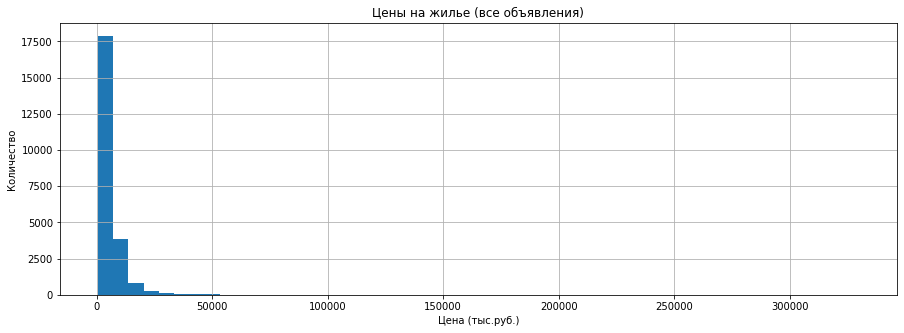

In [ ]:
# Рассмотрим цены на жилье, в пересчете на тыс. руб.
(data['last_price']/1000).hist(bins=50, figsize=(15, 5)).set(title='Цены на жилье (все объявления)',
    xlabel='Цена (тыс.руб.)', ylabel='Количество');

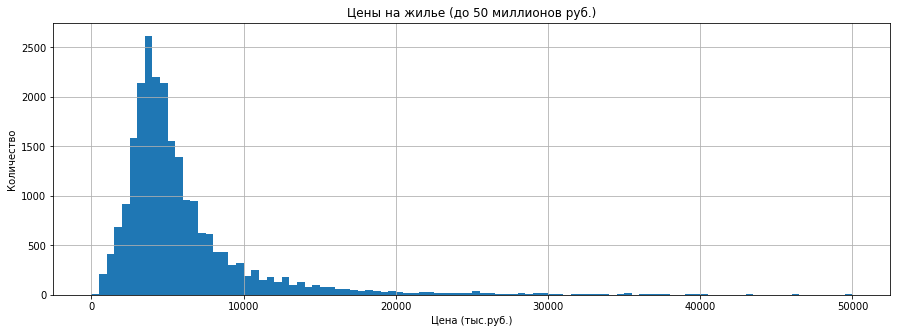

In [ ]:
# Рассмотрим цены на жилье, в пересчете на тыс. руб., не дороже 50 миллионов
(data['last_price']/1000).hist(bins=100, figsize=(15, 5), range=(0, 50000)).set(title='Цены на жилье (до 50 миллионов руб.)',
    xlabel='Цена (тыс.руб.)', ylabel='Количество');

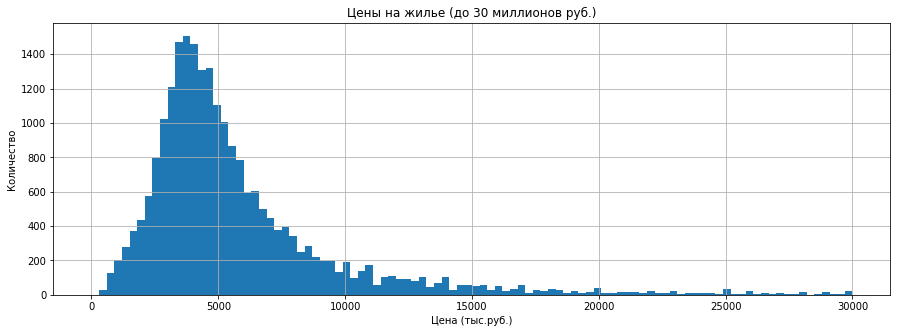

In [ ]:
# Рассмотрим цены на жилье, в пересчете на тыс. руб., не дороже 30 миллионов
(data['last_price']/1000).hist(bins=100, figsize=(15, 5), range=(0, 30000)).set(title='Цены на жилье (до 30 миллионов руб.)',
    xlabel='Цена (тыс.руб.)', ylabel='Количество');

Квартиры стоимость более 30 миллионов рублей представлены крайне малочисленно, т.к. имеют разовый характер не считаются резепрентативными в общем анализе. Считаю от них можно отказаться в дальнейшем исследовании

In [ ]:
print('Квартиры стоимостью более 30 000 000 руб.: ',data.query('last_price > 30000000')['last_price'].count())
# Удаляем
data.drop(index=data.query('last_price > 30000000').index,inplace=True)

Квартиры стоимостью более 30 000 000 руб.:  256


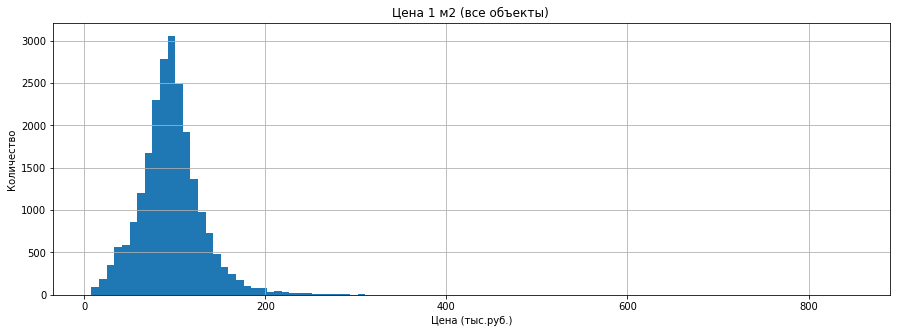

In [ ]:
# гистограмма цены 1 м2 в тыс.руб.
(data['price_sq_meter']/1000).hist(bins=100, figsize=(15, 5)).set(title='Цена 1 м2 (все объекты) ',
                            xlabel='Цена (тыс.руб.)', ylabel='Количество');

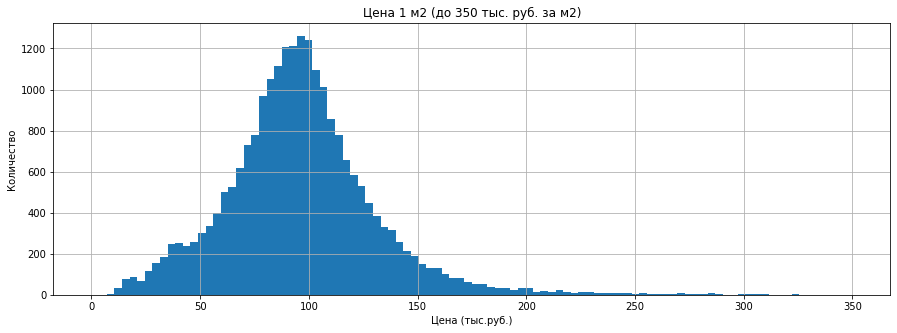

In [ ]:
# гистограмма цены 1 м2 в тыс.руб.
(data['price_sq_meter']/1000).hist(bins=100, figsize=(15, 5), range=(0, 350)).set(title='Цена 1 м2 (до 350 тыс. руб. за м2)',
                            xlabel='Цена (тыс.руб.)', ylabel='Количество');

Квартиры стоимостью более 250 тыс. руб. за м2 имеют разовый характер, малочислены и не резепрентативны, считаю, что для чистоты дальнейших исследований целесообразно отказаться от этих данных

In [ ]:
print('Квартиры стоимостью более 250 000 руб. за м2: ',data.query('price_sq_meter > 250000')['price_sq_meter'].count())
# Удаляем
data.drop(index=data.query('price_sq_meter > 250000').index,inplace=True)

Квартиры стоимостью более 250 000 руб. за м2:  80


**Вывод:**

Цены на квартиры в основном находятся в диапазоне 0.5-15 млн.руб.

Наблюдается пик в области 3-4 млн.руб.(вероятней всего саммый массовый сегмент - доступное жилье, небольшой площади) Стоимость квадратного метра недвижимости варьируется от 40 до 150 тыс.руб. с пиком в области 90-100 тыс.руб.

Тем не менее существуют объявления о продаже недвижимости с ценой свыше 300 млн.руб., которые являются нестандартными и имеют разовый характер.

#### Исследование объявлений в разрезе количества комнат в квартирах

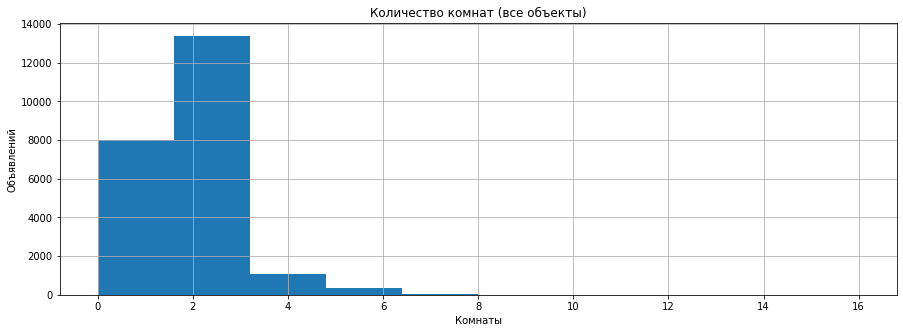

In [ ]:
data['rooms'].hist(bins=10, figsize=(15, 5)).set(title='Количество комнат (все объекты)',
    xlabel='Комнаты', ylabel='Объявлений');

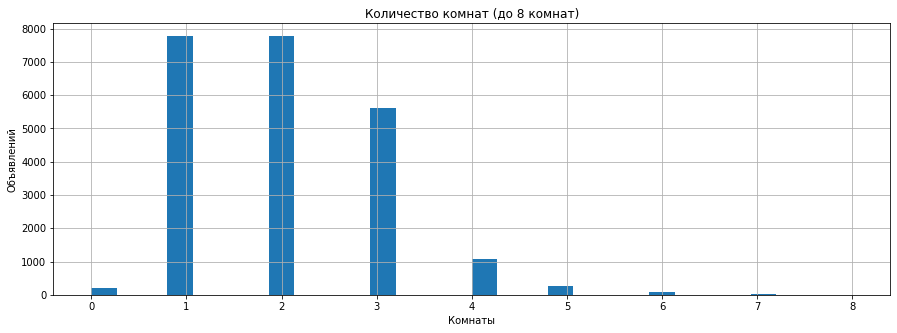

In [ ]:
data['rooms'].hist(bins=30, figsize=(15, 5), range=(0, 8)).set(title='Количество комнат (до 8 комнат)',
    xlabel='Комнаты', ylabel='Объявлений');

**Вывод:**

Основная часть квартир выставленных на продажу имеют от 0 (студии, свободная планировка) до 6 комнат.

Подавляющее большинство предложений - квартиры с 1, 2 или 3 комнатами

Квартиры с количествомм комнат больше 6 предлагаю не рассматривать в дальнейшем анализе, в виду их малочисленности

#### Исследование объявлений в разрезе высоты потолков

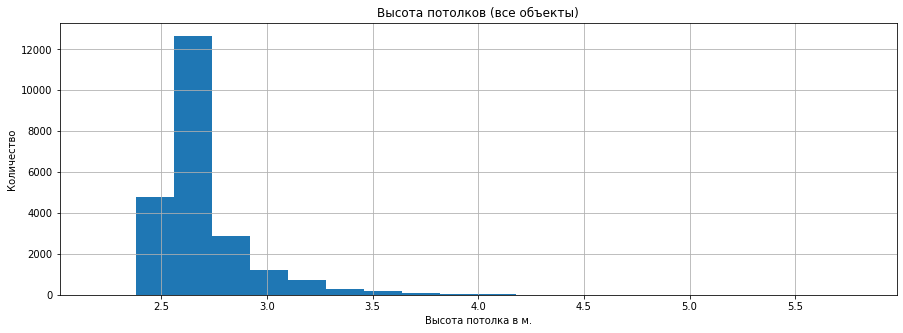

In [ ]:
# Построим общую гистрограму, отображающее распределение значений высоты потолков
data['ceiling_height'].hist(bins=20, figsize=(15, 5)).set(title='Высота потолков (все объекты)',
    xlabel='Высота потолка в м.', ylabel='Количество');

Допускаю, что имеется двухуровневая премиальная неджвижимость, с высотой потолков более 5 метров, но, как мы видим на гистограмме, это не показательные случаи, избавимся от этих объявлений

In [ ]:
print('Высота потолков более 5 м: ',data.query('ceiling_height > 5')['ceiling_height'].count())
# Удаляем
data.drop(index=data.query('ceiling_height > 5').index,inplace=True)

Высота потолков более 5 м:  2


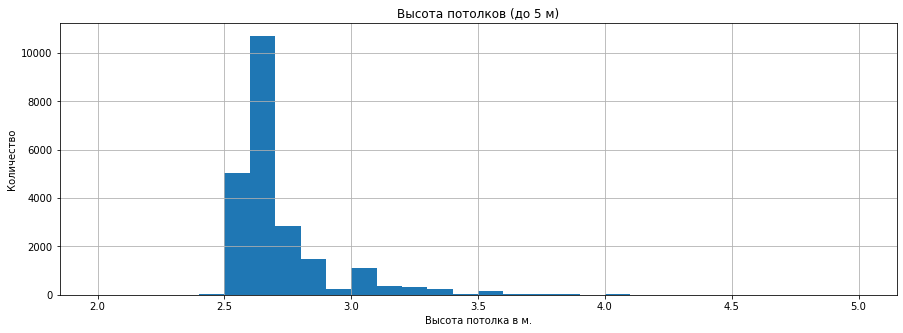

In [ ]:
# Построим общую гистрограму, отображающее распределение значений высоты потолков
data['ceiling_height'].hist(bins=30, figsize=(15, 5), range=(2, 5)).set(title='Высота потолков (до 5 м)',
    xlabel='Высота потолка в м.', ylabel='Количество');

**Вывод:**

Высота потолка, в исследуемых объявлениях находится в диапазоне от 2,5 м до 4 м

Основная масса недвижимости, представленная в объявлениях, имеет высоту от 2,6 м до 2,8 м, с ярким пиков в отметке 2,7 м

#### Исследование объявлений разрезе этажа квартиры

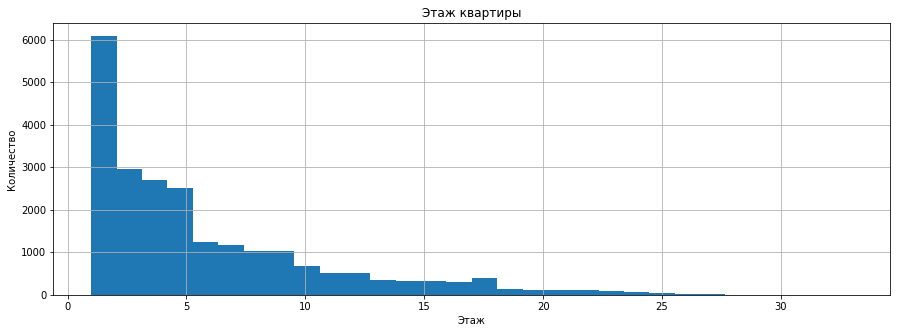

In [ ]:
# Построим общую гистрограму, отображающее распределение этажей объялвений
data['floor'].hist(bins=30, figsize=(15, 5)).set(title='Этаж квартиры',
    xlabel='Этаж', ylabel='Количество');

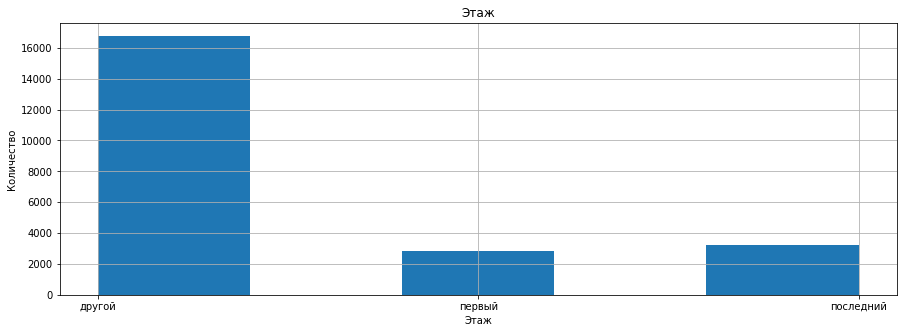

In [ ]:
data['floor_group'].hist(bins=5, figsize=(15, 5)).set(title='Этаж',
    xlabel='Этаж', ylabel='Количество');

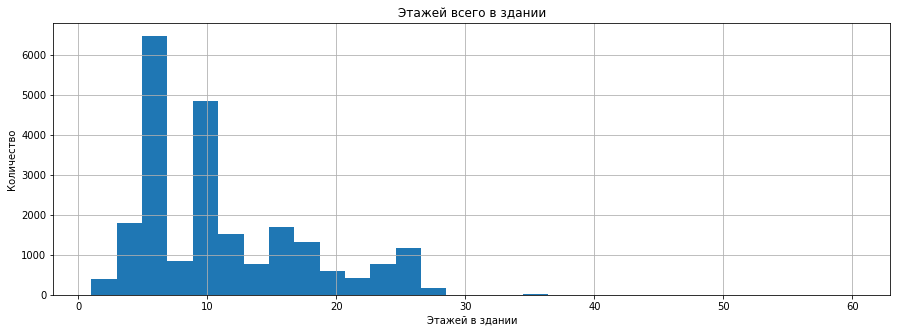

In [ ]:
data['floors_total'].hist(bins=30, figsize=(15, 5)).set(title='Этажей всего в здании',
    xlabel='Этажей в здании', ylabel='Количество');

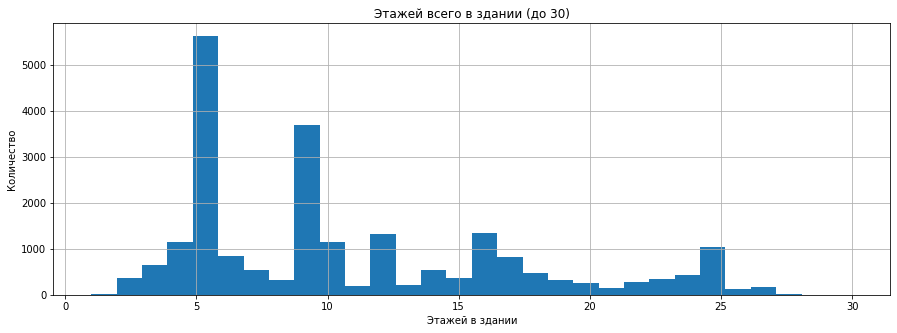

In [ ]:
data['floors_total'].hist(bins=30, figsize=(15, 5), range=(1, 30)).set(title='Этажей всего в здании (до 30)',
    xlabel='Этажей в здании', ylabel='Количество');

**Вывод:**

Основная количество объявлений приходится на квартиры расположенные с 1 по 5 этаж, с явным пиком на 1-ом этаже.

Если же рассмотреть в разрезе группировки этажей на первый, последний и другие, то видно, что наименнее популярными являются объявления с квартирами расположенными на 1-ом этаже, с небольшим отрывом идут объявления с последним этажом. И, как мы видим на гистограмме, с отрывом в несколько раз больше идут предложения о продаже квартир на остальных этажах, что в принципе, логично

Наиболее распространенными объявлениями представлены квартиры, находящиеся с 6-ти и 9-ти этажных зданиях.

В принципе, все выглядит логичным, Санкт-Петербург не славится городом с небоскребами, кроме того ближайшие поселки и населенные пункты, вероятней всего не имеют многоэтажных построек.

#### Исследование объявлений в разрезе расстояний до центра города, ближайшего аэропорта, ближайшего парка и ближайшего водоема

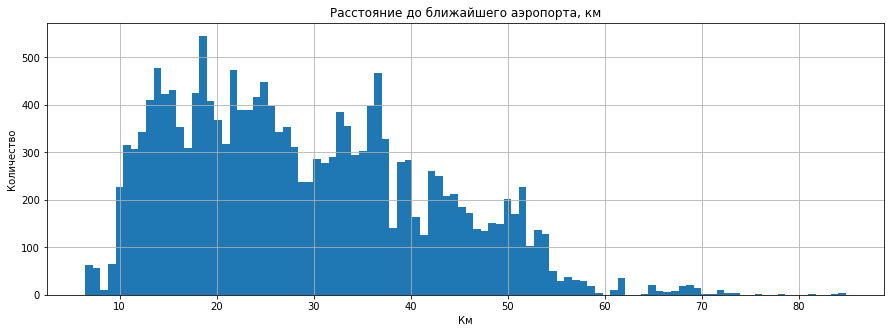

In [ ]:
(data['airports_nearest']/1000).hist(bins=100, figsize=(15, 5)).set(title='Расстояние до ближайшего аэропорта, км',
    xlabel='Км', ylabel='Количество');

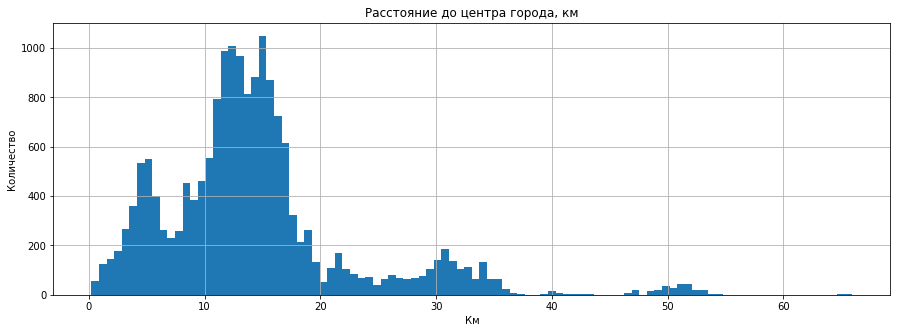

In [ ]:
(data['city_centers_nearest']/1000).hist(bins=100, figsize=(15, 5)).set(title='Расстояние до центра города, км',
    xlabel='Км', ylabel='Количество');

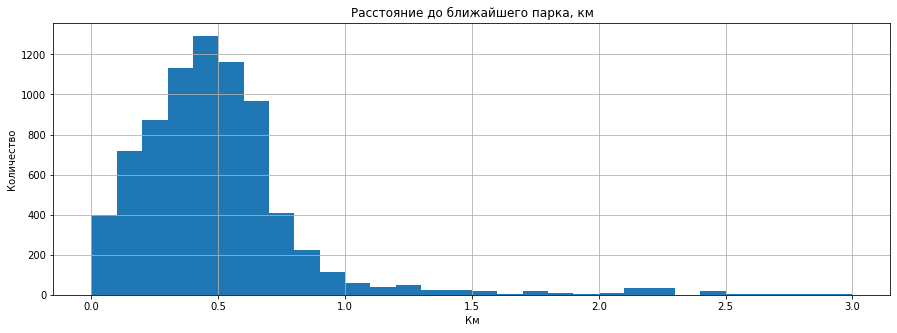

In [ ]:
(data['parks_nearest']/1000).hist(bins=30, figsize=(15, 5), range=(0, 3)).set(title='Расстояние до ближайшего парка, км',
    xlabel='Км', ylabel='Количество');

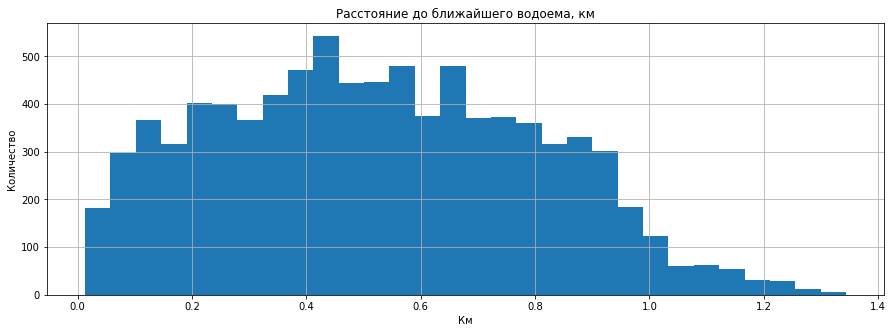

In [ ]:
(data['ponds_nearest']/1000).hist(bins=30, figsize=(15, 5)).set(title='Расстояние до ближайшего водоема, км',
    xlabel='Км', ylabel='Количество');

**Вывод:**

В общем, наблюдается нормальное распределение, но только имеющихся данных, существует довольно много пропусков, заполнить которые, с сохранением объективности общей тенденции графиков, не представляется возможным.

#### Исследование объявлений в разрезе дня и месяца публикации

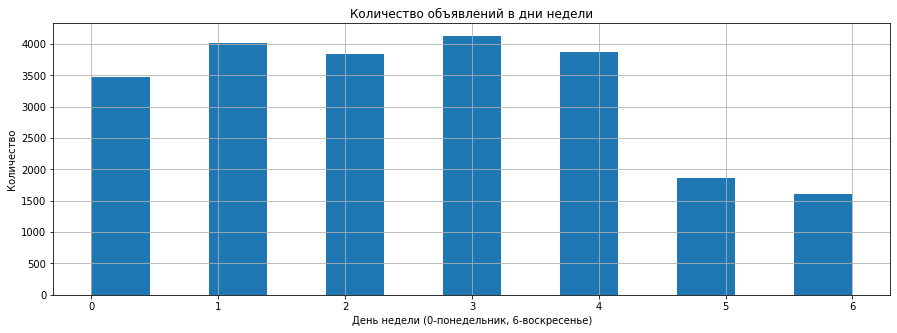

In [ ]:
data['weekday_exposition'].hist(bins=13, figsize=(15, 5)).set(title='Количество объявлений в дни недели',
    xlabel='День недели (0-понедельник, 6-воскресенье)', ylabel='Количество');

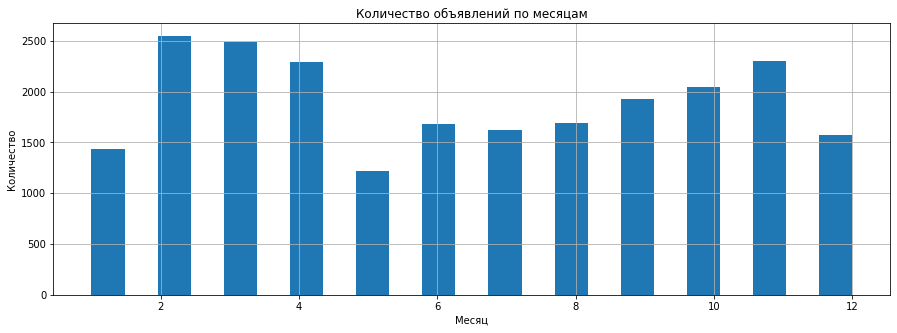

In [ ]:
data['monht_exposition'].hist(bins=23, figsize=(15, 5)).set(title='Количество объявлений по месяцам',
    xlabel='Месяц', ylabel='Количество');

<div class="alert alert-info">
<b>Комментарий студента:
Вывод:</b>
<br>
Наблюдается ощутимый спад количества объявлений, выкладываемых на выходных днях.
    
Так же наименее популярное время для продажи квартиры наблюдаем в январе и мае месяце, а пик на конец осени, конец зимы и первую половину весы
</div>

#### Исследование времени продажи квартиры

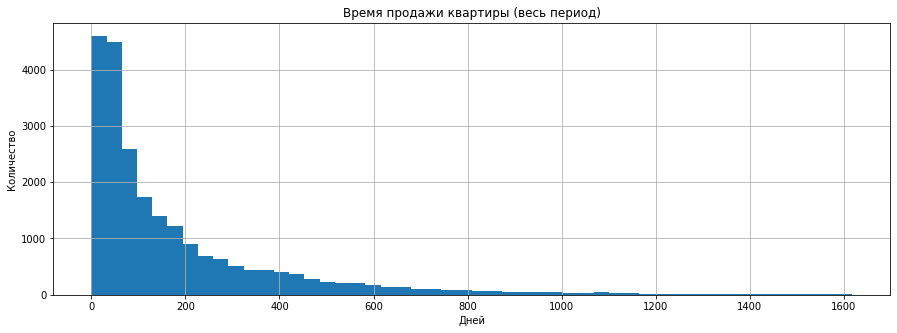

In [ ]:
# Построим общую гистограмму времени продажи:
data['days_exposition'].hist(bins=50, figsize=(15, 5)).set(title='Время продажи квартиры (весь период)',
     xlabel='Дней', ylabel='Количество');

В первые 100 дней динамика продаж самая активная, но предварительно рассмотрим отрезок до 400 дней

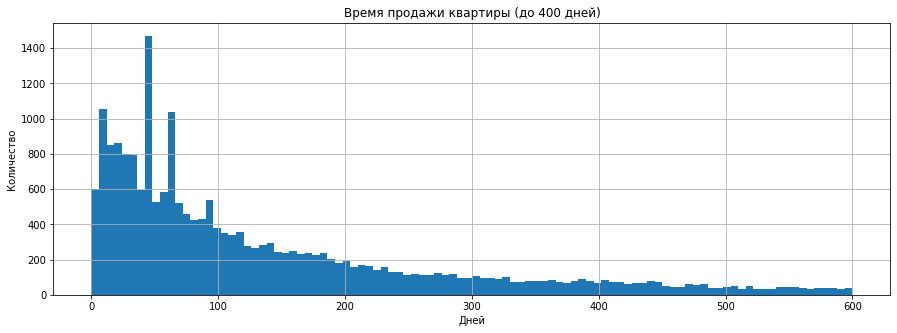

In [ ]:
# Построим гистограмму времени продажи до 400 дней:
data['days_exposition'].hist(bins=100, figsize=(15, 5), range=(0, 600)).set(title='Время продажи квартиры (до 400 дней)',
    xlabel='Дней', ylabel='Количество');

Наблюдаем 2 пика продаж на сроке до 100 дней, при детальном рассмотрении уже видим, что динамика более плавная

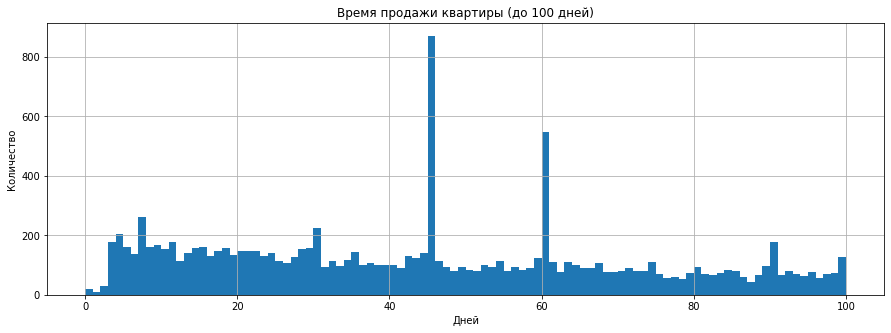

In [ ]:
# Построим гистограмму времени продажи до 100 дней:
data['days_exposition'].hist(bins=100, figsize=(15, 5), range=(0, 100)).set(title='Время продажи квартиры (до 100 дней)',
    xlabel='Дней', ylabel='Количество');

Пики продаж отчетливо виднеются, примерно 45 и 61 дни объявлений.

В рамках этой де гистрограммы видно, что продажи, совершенные раньше 5 дней - аномально быстрые

Предполагаю, что пики связаны с техническими особенностями площадок, на которых были выложены объявления. А именно - автоматическое снятие с публикации по прошествии определенного времени

**Вывод:**

Из изучения гистрограмм видно, что большинство квартир продаются в первые 2 месяца, в дальнейшем идет снижение вероятности продаж, но без резких провалов

**Общий вывод по 3 разделу:**

В жилой площади квартиры преобладает диапазон 15-35 м2, и с несколько меньшим пиком в диапазоне 40-50 м2.

Диапазон площади кухни - в основном от 5 до 15 кв.м., с пиком 9 кв.м.

Соотношение площади кухни к общей площади квартиры -на уровне 10-40% с пиком на 10-20%. .

Цены на квартиры в основном находятся в диапазоне 0.5-15 млн.руб.

Наблюдается пик в области 3-4 млн.руб.(вероятней всего саммый массовый сегмент - доступное жилье, небольшой площади) Стоимость квадратного метра недвижимости варьируется от 40 до 150 тыс.руб. с пиком в области 90-100 тыс.руб.

Основная часть квартир выставленных на продажу имеют от 0 (студии, свободная планировка) до 6 комнат.

Подавляющее большинство предложений - квартиры с 1, 2 или 3 комнатами

Основная масса недвижимости, представленная в объявлениях, имеет высоту от 2,6 м до 2,8 м, с ярким пиков в отметке 2,7 м

Основная количество объявлений приходится на квартиры расположенные с 1 по 5 этаж, с явным пиком на 1-ом этаже.

Если же рассмотреть в разрезе группировки этажей на первый, последний и другие, то видно, что наименнее популярными являются объявления с квартирами расположенными на 1-ом этаже, с небольшим отрывом идут объявления с последним этажом. И, как мы видим на гистограмме, с отрывом в несколько раз больше идут предложения о продаже квартир на остальных этажах, что в принципе, логично

Наиболее распространенными объявлениями представлены квартиры, находящиеся с 6-ти и 9-ти этажных зданиях.

Большинство квартир продаются в первые 2 месяца, в дальнейшем идет снижение вероятности продаж, но без резких провалов

### Факторы больше всего влияющие на общую (полную) стоимость объекта

Изучим корреляцию между разными данными

Предлагаю, касаясь вопроса сравнивания цен, отталкиваться от цены за м2

Логично предположить (и мы проверим это на графике), что общая площадь формирует абсолютную цену

In [ ]:
data[['price_sq_meter',
                  'last_price',
                  'total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  ]].corr()

,price_sq_meter,last_price,total_area,living_area,kitchen_area,rooms
price_sq_meter,1.000000,0.639487,0.132663,0.032420,0.303476,-0.072339
last_price,0.639487,1.000000,0.806180,0.688820,0.593172,0.537847
total_area,0.132663,0.806180,1.000000,0.916634,0.559242,0.794996
living_area,0.032420,0.688820,0.916634,1.000000,0.353853,0.882791
kitchen_area,0.303476,0.593172,0.559242,0.353853,1.000000,0.245139
rooms,-0.072339,0.537847,0.794996,0.882791,0.245139,1.000000


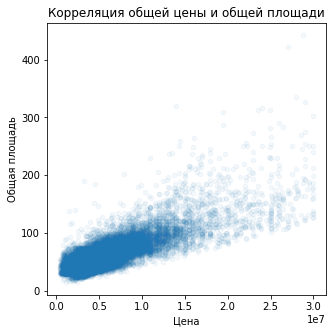

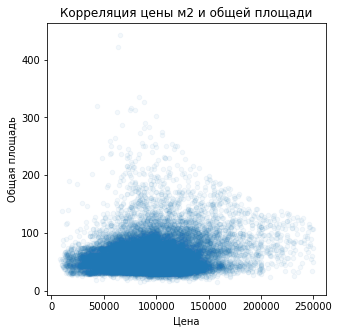

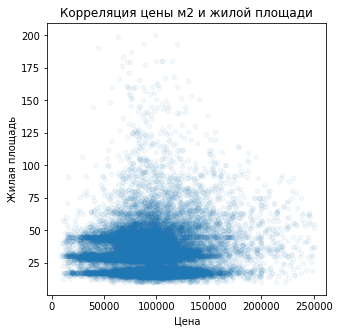

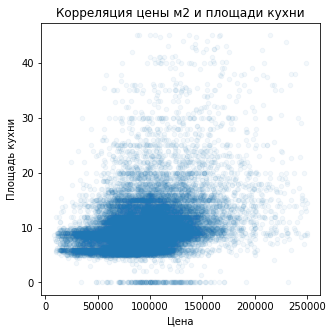

In [ ]:
# Подтвердим довод я прямой зависимости общей цены
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.05, figsize=(5, 5)).set(
    title='Корреляция общей цены и общей площади',
    xlabel='Цена', ylabel='Общая площадь');
# Посмотрим на распределение корреляции общей площади и цены м2
data.plot(x='price_sq_meter', y='total_area', kind='scatter', alpha=0.05, figsize=(5, 5)).set(
    title='Корреляция цены м2 и общей площади',
    xlabel='Цена', ylabel='Общая площадь');
# Посмотрим на распределение корреляции жилой площади и цены м2
data.plot(x='price_sq_meter', y='living_area', kind='scatter', alpha=0.05, figsize=(5, 5)).set(
    title='Корреляция цены м2 и жилой площади',
    xlabel='Цена', ylabel='Жилая площадь');
# Посмотрим на распределение корреляции площади кухни и цены м2
data.plot(x='price_sq_meter', y='kitchen_area', kind='scatter', alpha=0.05, figsize=(5, 5)).set(
    title='Корреляция цены м2 и площади кухни',
    xlabel='Цена', ylabel='Площадь кухни');

Рассмотрим корреляцию цены за м2 и комнат

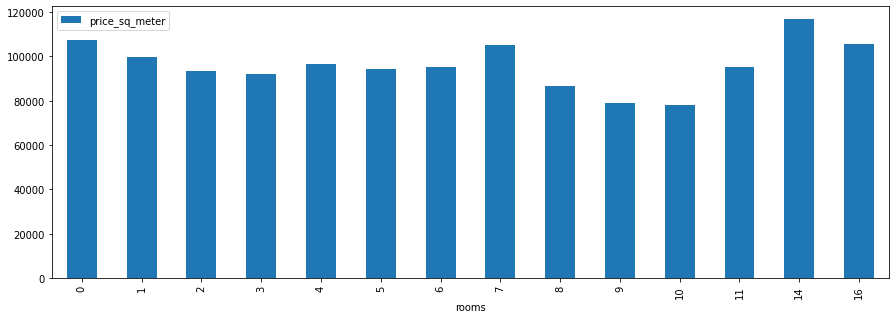

In [ ]:
data.pivot_table(index='rooms',values='price_sq_meter').plot(y='price_sq_meter', kind='bar', figsize=(15, 5));

**Вывод:**

Корреляция между общей площадью и общей ценой, ожидаемо, имеет высокий процент (80%). В дальнейшем не вижу смысла оперировать общей ценой, т.к. основной показатель стоимость недвижимости является цена за м2. Совершенно ожидаемо, что чем больше квартира, тем дороже она стоит, при прочих равных.

При рассмотрении корреляции между стоимостью м2 и общей площадью можно заметить, что относительно высокая цена за м2 наиболее широко представлена в квартирах до 110 м2. Та же тенденция видна и при рассмотрении корреляции стоимости м2 и илой площади. Интереснен и тот факт, что квартиры с большой площадью (более 150 м2) имеют более менее среднерыночную стоимость м2.

Но когда дело доходит до рассмотрения корреляции между стоимостью м2 и площадью кухни, сразу видна тенденция. На стоимость квадратного метра более ощутимо влияет площадь кухни в квартире.

Возможно такой спрос (а значит и предложение) вызвано гостепримством нашего народа, а может мы просто любим поесть ). Но среди рассматриваемых пар это наивысшая корреляция 30%

Количество комнат, при общем рассмотрении практически не показывает корреляции. Но когда мы рассмотрим среднюю цену м2 для каждой группы (по комнатам), то заметим, что цена в недвижимость с 0 комнатами (а это студии (преимущественно) и квартиры со свободной планировкой) выше стандартных квартир, и граничат с премиальным жильем.

Рассмотрим зависимость цены квадратного метра квартиры от этажа

In [ ]:
data[['price_sq_meter','floor', 'floor_group']].corr()

,price_sq_meter,floor
price_sq_meter,1.000000,0.217439
floor,0.217439,1.000000


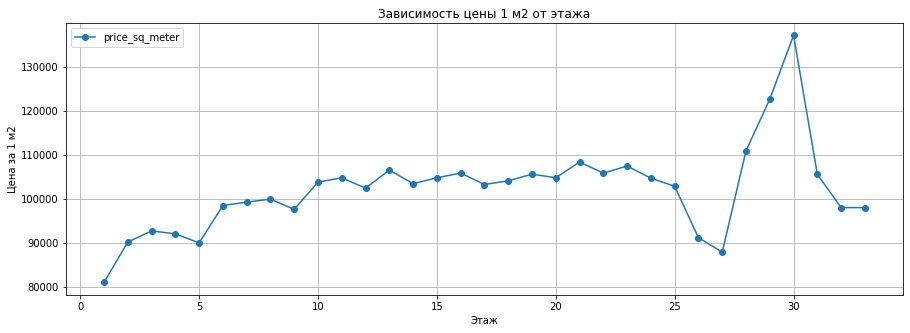

In [ ]:
data.pivot_table(index='floor', values='price_sq_meter', aggfunc='median').reset_index().plot(
                      x='floor', y='price_sq_meter', grid=True, style='o-',  figsize=(15, 5)).set(
                      title='Зависимость цены 1 м2 от этажа',
                      xlabel='Этаж', ylabel='Цена за 1 м2');

На графике отчетливо видно, что первый этаж имеет наименьшую стоимость м2.

Видны проседания цены м2 на 5 и 9 этажах. Вероятнее всего связанно с общей этажностью домов (являются последними этажами, в части объявлений).

Наблюдем резкий пик в области 30 этажа. Предполагаю, что цена коррелирует не только с этажом, но и с видом который открывается из окна.

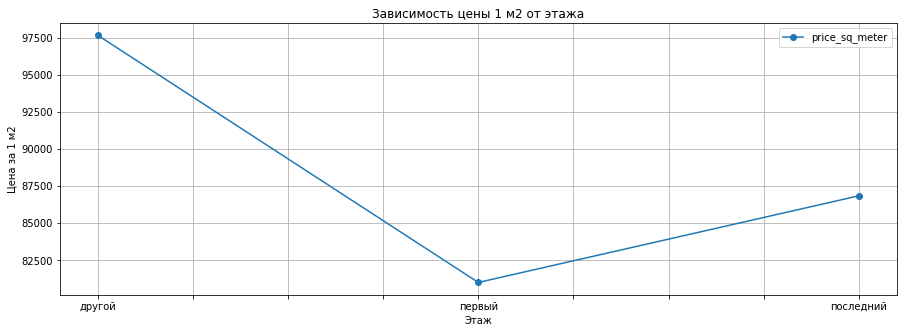

In [ ]:
data.pivot_table(index='floor_group', values='price_sq_meter', aggfunc='median').reset_index().plot(
                      x='floor_group', y='price_sq_meter', grid=True, style='o-',  figsize=(15, 5)).set(
                      title='Зависимость цены 1 м2 от этажа',
                      xlabel='Этаж', ylabel='Цена за 1 м2');

Это график хорошо показывает, насколько первый этаж дешевле остальных, более 15 000 руб. за м2 (от других этажей, не считая последнего) это существенная разница.

Последний этаж, так же проседает в средней цене за м2, но не настолько сильно как первый.

**Вывод:**

Сильная зависимость цены м2 наблюдается при условии, что квартира находится либо на 1-ом, либо на последнем этаже. В остальных случаях корреляция не столь очевидна и может зависить от множества факторов, которые нет возможности отразить в ходе данного исследования (район, инфраструктура, вид из окна)

Рассмотрим зависимость стоимости м2 от времени размещения объявления

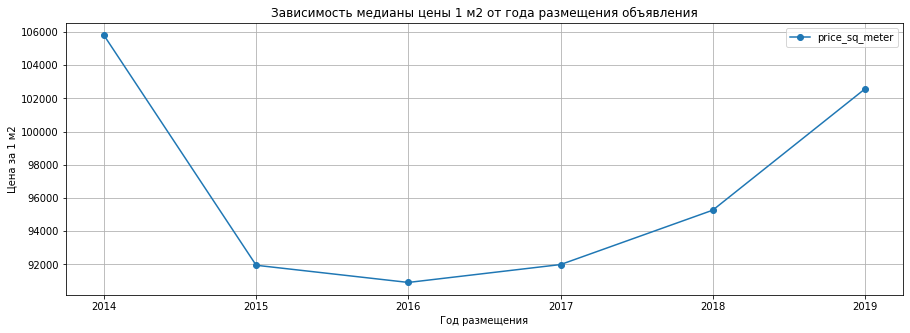

In [ ]:
# Рассмотрим как менялась цена за 1 м2 в течение нескольких лет:
data.pivot_table(index='year_exposition', values='price_sq_meter', aggfunc='median').reset_index().plot(
                      x='year_exposition', y='price_sq_meter', grid=True, style='o-', figsize=(15, 5)).set(
                      title='Зависимость медианы цены 1 м2 от года размещения объявления',
                      xlabel='Год размещения', ylabel='Цена за 1 м2');

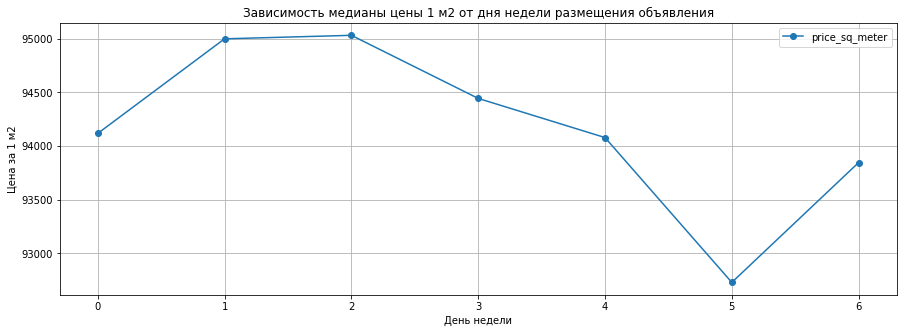

In [ ]:
# Рассмотрим как зависит цена за 1 м2 от дня недели:
data.pivot_table(index='weekday_exposition', values='price_sq_meter', aggfunc='median').reset_index().plot(
                      x='weekday_exposition', y='price_sq_meter', grid=True, style='o-', figsize=(15, 5)).set(
                      title='Зависимость медианы цены 1 м2 от дня недели размещения объявления',
                      xlabel='День недели', ylabel='Цена за 1 м2');

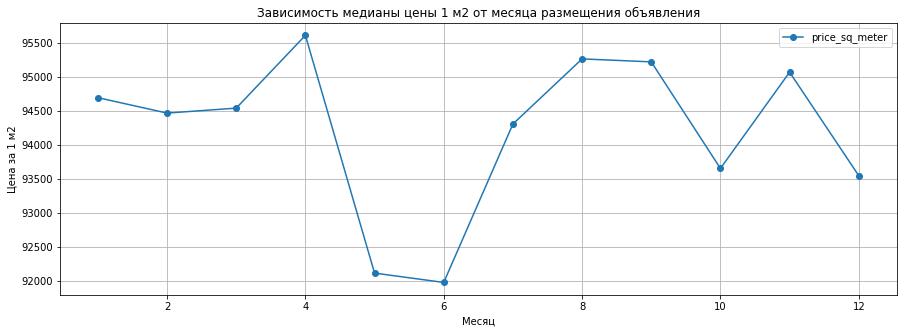

In [ ]:
# Рассмотрим как зависит цена за 1 м2 от месяца:
data.pivot_table(index='monht_exposition', values='price_sq_meter', aggfunc='median').reset_index().plot(
                      x='monht_exposition', y='price_sq_meter', grid=True, style='o-', figsize=(15, 5)).set(
                      title='Зависимость медианы цены 1 м2 от месяца размещения объявления',
                      xlabel='Месяц', ylabel='Цена за 1 м2');

**Вывод:**

Цена квадратного метра довольно сильно просела после 2014 года, вероятнее всего причина тому кризис на рынке недвижимости.
Постепенно цена м2 с течением времени растет.

Касательно дней недели: цена м2 во вторник и среду выше, чем в остальные дни. В субботу наименьшее значение.

При рассмотрении стоимости м2 по месяцам, видна сильная просадка в начале летнего периода.

Создадим список из 10 населенных пунктов, где больше всего объявлений и посчитаем среднюю стоимость м2

In [ ]:
# Создаем новый датафрейм, отсортированный по убыванию
top_10 = data['locality_name'].value_counts().head(10)

# Сбросим индекс, переименуем колонки, для следующего шага
top_10 = top_10.reset_index().rename(columns = {'locality_name':'mean','index':'locality_name'})
display(top_10)

,locality_name,mean
0,санкт-петербург,15049
1,поселок мурино,524
2,поселок шушары,433
3,всеволожск,389
4,пушкин,363
5,колпино,334
6,поселок парголово,325
7,гатчина,302
8,деревня кудрово,285
9,выборг,231


In [ ]:
# Список для сохранения значений средней стоимости 1 м2
top_mean = []

# Цикл для расчета средних значений стоимости 1 м2 городов в топ-10 и добавления
for name in top_10['locality_name']:
    top_mean.append(round(data.query('locality_name == @name')['price_sq_meter'].mean()))

# Присваем столбцу значения списка
top_10['mean'] = top_mean
display(top_10)

,locality_name,mean
0,санкт-петербург,109374
1,поселок мурино,85280
2,поселок шушары,78322
3,всеволожск,67302
4,пушкин,102507
5,колпино,75305
6,поселок парголово,90179
7,гатчина,68700
8,деревня кудрово,92243
9,выборг,57972


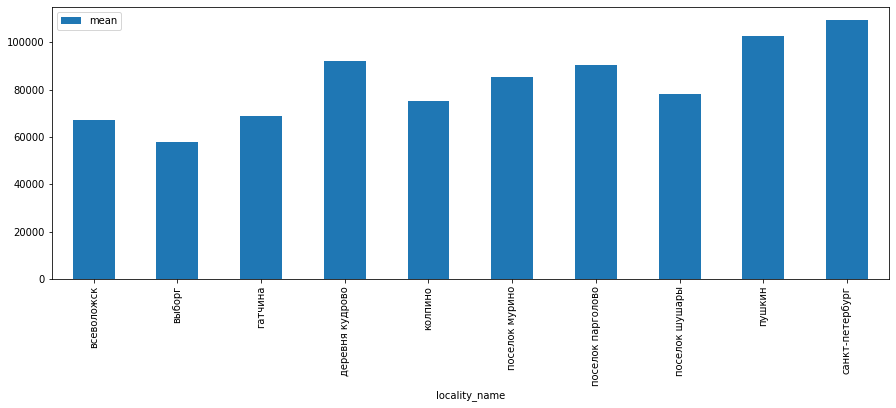

In [ ]:
top_10.pivot_table(index='locality_name',values='mean').plot(y='mean', kind='bar', figsize=(15, 5));

Найдем населенные пункты с минимальной и максимальной ценой за м2

In [ ]:
display(top_10.query('mean == mean.min() or mean == mean.max()'))

,locality_name,mean
0,санкт-петербург,109374
9,выборг,57972


Город с максимальной средней ценой за метр квадратный: Санкт-Петербург - 109 374 руб. за м2, с минимальной: Выборг - 57 972 руб. за м2

Рассмотрим зависимость расстояния от центра города и цены, как за м2, так и абсолютной

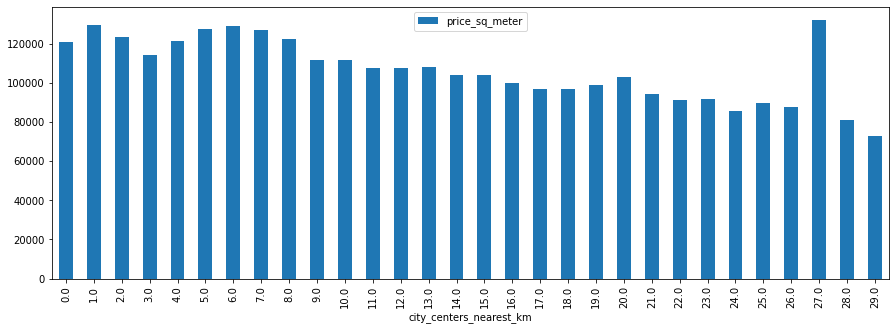

In [ ]:
(
data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='price_sq_meter',
        aggfunc='mean')
    .plot(kind='bar', figsize=(15, 5))
);

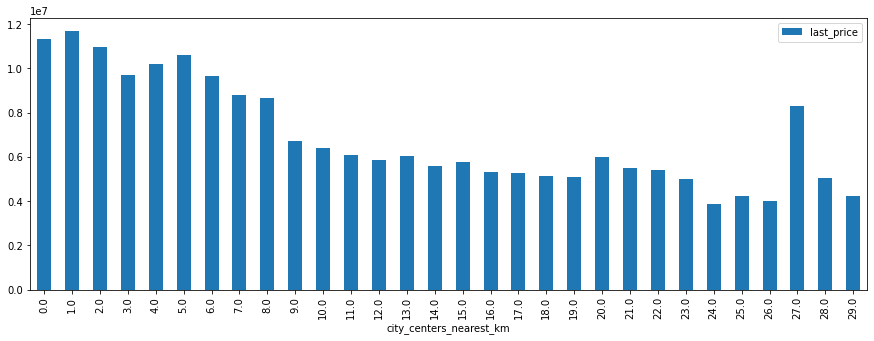

In [ ]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar', figsize=(15, 5))
);

**Вывод:**

При наблюдении стоимости квадратного метра, в радиусе 8 км, находится примерно на одном уровне. Начиная с 9-го киломентра стоимость квадратного метра начинает снижаться пропорционально удалению. Наблюдается выброс на 27 километре, связанный с тем, что этой удаленности находится дорогой объект.

Если рассмотреть абсолютную стоимость объектов недвижимости относительно удаленности от центра: наблюдается прямая зависимость - чем ближе к центру, тем дороже квартира, а учитывая прошлую визуализацию, и больше. Выброс на 27 километре ожидаемо наблюдается и в этом наблюдении

In [ ]:
display(len(data_old) - len(data))

886

In [ ]:
data.shape[0] / data_old.shape[0]

0.9626144563061733

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В рамках исследования удалось рассмотреть 96,26% изначальных данных
</div>

### Общий вывод

База данных представленная для анализа содержит информацию о квартирах выставленных на продажу. Часть данных заполнялась пользователем (количество комнат, цена, площадь и т.д.), часть - заполнялась автоматически площадкой, на основе картографических данных (расстояние до центра, до аэропорта и т.д.)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
В результате предобработки данных пришлось отказаться от 886 объявлений, т.к. информация в них были недостоверной и могла негативно повлиять на дальнейший анализ
</div>

В результате предобработки данных были выявлены пропуски, ошибки в представленных значениях (не соотвествовали реальности). Вероятнее всего база данных агрегировалась с разных источников, что повлекло пропуски и ошибки в ряде столбцов, кроме того часть неверно заполненных, или вовсе не заполненных, данных являлась следствием человеческих факторов (результатом работы пользователей). Были сгенерированны, с учетом медианных значений групп, новые данные, что бы сохранить, где это возможно, информацию для более полной картины дальнейших исследований.

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа, соотношения жилой площади и площади кухни к общей.

Исследование показало, что на рынке недвижимости представлено жилье эконом и премиум класса с большим разбросом площади и цены. При этом мы наблюдаем, что цена квадратного метра наиболее сильно коррелируется с площадью кухни.
Прослеживается и сезонность цен: в целом после окончания года к марту цена начинает расти, а летом падает. Это связано с экономикой: спад, как правило прослеживается в феврале и летом.

Максимальная стоимость жилья - в Санкт-Петербурге, минимальная - в Выборге.
Стоимость квадратного метра не сильно коррелируется (в зависимости от удаленности от центра) в радиусе первых 8 км, но потом более проявляется. Абсолютная стоимость квартир тем больше, чем ближе к центру.